# Setting

In [ ]:
!pip install google-generativeai --upgrade
!pip install --upgrade google-generativeai
import time
import google.generativeai as genai
!pip install ace_tools

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json


from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Anonimo

In [ ]:
# import pandas as pd
# import numpy as np

# def generate_anonymized_and_expanded_dataset(df, base_month='2025-04-01', months_back=4,
#                                               max_shelves=5, max_products=25, seed=42):
#     np.random.seed(seed)
#     df = df.copy()

#     # --- Asegurar formato de fecha ---
#     df['Location Local Datetime'] = pd.to_datetime(df['Location Local Datetime'], errors='coerce')

#     # --- Filtrar datos del mes base (ej. abril 2025) ---
#     base_start = pd.to_datetime(base_month)
#     base_end = base_start + pd.DateOffset(months=1)
#     df_base = df[(df['Location Local Datetime'] >= base_start) &
#                  (df['Location Local Datetime'] < base_end)].copy()

#     # --- Anonimizar Locations ---
#     unique_locations = df_base['Location'].unique()
#     location_mapping = {loc: f"Store {chr(65+i)}" for i, loc in enumerate(unique_locations)}
#     location_id_mapping = {v: i+1 for i, v in enumerate(location_mapping.values())}
#     df_base['Location'] = df_base['Location'].map(location_mapping)
#     df_base['Location Id'] = df_base['Location'].map(location_id_mapping)

#     # --- Anonimizar Deployments (shelves) ---
#     unique_deployments = df_base['Deployment'].unique()[:max_shelves]
#     deployment_mapping = {dep: f"Shelf {i+1}" for i, dep in enumerate(unique_deployments)}
#     deployment_id_mapping = {v: i+1 for i, v in enumerate(deployment_mapping.values())}
#     df_base['Deployment'] = df_base['Deployment'].map(deployment_mapping)
#     df_base['Deployment Id'] = df_base['Deployment'].map(deployment_id_mapping)

#     # --- Anonimizar Placement como Deployment ---
#     df_base['Placement'] = df_base['Deployment']
#     placement_mapping = {plc: plc for plc in df_base['Placement'].unique()}
#     placement_id_mapping = {plc: i+1 for i, plc in enumerate(placement_mapping)}
#     df_base['Placement Id'] = df_base['Placement'].map(placement_id_mapping)

#     # --- Anonimizar Products ---
#     unique_products = df_base['Product'].dropna().unique()[:max_products]
#     product_mapping = {prod: f"Product {i+1}" for i, prod in enumerate(unique_products)}
#     product_id_mapping = {v: i+1 for i, v in enumerate(product_mapping.values())}
#     df_base['Product'] = df_base['Product'].map(product_mapping)
#     df_base['Product Id'] = df_base['Product'].map(product_id_mapping)

#     # --- Generar datos sintéticos de meses anteriores ---
#     synthetic_data = []
#     for i in range(1, months_back + 1):
#         month_shift = pd.DateOffset(months=-i)
#         df_synthetic = df_base.copy()
#         df_synthetic['Location Local Datetime'] = df_synthetic['Location Local Datetime'] + month_shift

#         # Variar datos numéricos levemente
#         if 'Data' in df_synthetic.columns:
#             df_synthetic['Data'] = np.clip(
#                 df_synthetic['Data'] + np.random.randint(-1, 2, size=len(df_synthetic)), 0, 10
#             )

#         synthetic_data.append(df_synthetic)

#     # --- Combinar todo ---
#     final_df = pd.concat(synthetic_data + [df_base], ignore_index=True)
#     final_df = final_df.sort_values('Location Local Datetime').reset_index(drop=True)

#     return final_df


In [ ]:
# import pandas as pd
# import numpy as np

# def generate_anonymized_and_expanded_dataset(df, base_month='2025-04-01', months_back=4,
#                                               max_shelves=5, max_products=25, seed=42):
#     np.random.seed(seed)
#     df = df.copy()

#     # --- Asegurar formato de fecha ---
#     df['Location Local Datetime'] = pd.to_datetime(df['Location Local Datetime'], errors='coerce')

#     # --- Filtrar datos del mes base (ej. abril 2025) ---
#     base_start = pd.to_datetime(base_month)
#     base_end = base_start + pd.DateOffset(months=1)
#     df_base = df[(df['Location Local Datetime'] >= base_start) &
#                  (df['Location Local Datetime'] < base_end)].copy()

#     # --- Anonimizar Locations ---
#     unique_locations = df_base['Location'].unique()
#     location_mapping = {loc: f"Store {chr(65+i)}" for i, loc in enumerate(unique_locations)}
#     location_id_mapping = {v: i+1 for i, v in enumerate(location_mapping.values())}
#     df_base['Location'] = df_base['Location'].map(location_mapping)
#     df_base['Location Id'] = df_base['Location'].map(location_id_mapping)

#     # --- Crear shelves diferentes por Store ---
#     df_base['Deployment'] = None
#     df_base['Deployment Id'] = None
#     df_base['Placement'] = None
#     df_base['Placement Id'] = None

#     final_rows = []

#     for store in df_base['Location'].unique():
#         store_df = df_base[df_base['Location'] == store].copy()
#         shelves = [f"Shelf {i+1}" for i in range(max_shelves)]
#         shelf_ids = list(range(1, max_shelves + 1))

#         # Reasignar shelves aleatoriamente
#         store_df['Deployment'] = np.random.choice(shelves, size=len(store_df), replace=True)
#         store_df['Deployment Id'] = store_df['Deployment'].map({s: i+1 for i, s in enumerate(shelves)})

#         # Hacer Placement igual a Deployment
#         store_df['Placement'] = store_df['Deployment']
#         store_df['Placement Id'] = store_df['Deployment Id']

#         final_rows.append(store_df)

#     df_base = pd.concat(final_rows, ignore_index=True)

#     # --- Anonimizar Products ---
#     unique_products = df_base['Product'].dropna().unique()[:max_products]
#     product_mapping = {prod: f"Product {i+1}" for i, prod in enumerate(unique_products)}
#     product_id_mapping = {v: i+1 for i, v in enumerate(product_mapping.values())}
#     df_base['Product'] = df_base['Product'].map(product_mapping)
#     df_base['Product Id'] = df_base['Product'].map(product_id_mapping)

#     # --- Generar datos sintéticos de meses anteriores ---
#     synthetic_data = []
#     for i in range(1, months_back + 1):
#         month_shift = pd.DateOffset(months=-i)
#         df_synthetic = df_base.copy()
#         df_synthetic['Location Local Datetime'] = df_synthetic['Location Local Datetime'] + month_shift

#         # Variar datos numéricos levemente
#         if 'Data' in df_synthetic.columns:
#             df_synthetic['Data'] = np.clip(
#                 df_synthetic['Data'] + np.random.randint(-1, 2, size=len(df_synthetic)), 0, 10
#             )

#         synthetic_data.append(df_synthetic)

#     # --- Combinar todo ---
#     final_df = pd.concat(synthetic_data + [df_base], ignore_index=True)
#     final_df = final_df.sort_values('Location Local Datetime').reset_index(drop=True)

#     return final_df


In [ ]:
# import pandas as pd
# import numpy as np

# def generate_anonymized_and_expanded_dataset(df, base_month='2025-04-01', months_back=4,
#                                               max_products=25, seed=42):
#     np.random.seed(seed)
#     df = df.copy()

#     # --- Asegurar formato de fecha ---
#     df['Location Local Datetime'] = pd.to_datetime(df['Location Local Datetime'], errors='coerce')

#     # --- Filtrar datos del mes base (ej. abril 2025) ---
#     base_start = pd.to_datetime(base_month)
#     base_end = base_start + pd.DateOffset(months=1)
#     df_base = df[(df['Location Local Datetime'] >= base_start) &
#                  (df['Location Local Datetime'] < base_end)].copy()

#     # --- Anonimizar Locations ---
#     unique_locations = df_base['Location'].unique()
#     location_mapping = {loc: f"Store {chr(65+i)}" for i, loc in enumerate(unique_locations)}
#     location_id_mapping = {v: i+1 for i, v in enumerate(location_mapping.values())}
#     df_base['Location'] = df_base['Location'].map(location_mapping)
#     df_base['Location Id'] = df_base['Location'].map(location_id_mapping)

#     # --- Crear shelves únicos por tienda ---
#     df_base['Deployment'] = None
#     df_base['Deployment Id'] = None
#     df_base['Placement'] = None
#     df_base['Placement Id'] = None

#     shelf_counter = 1
#     final_rows = []

#     for store in df_base['Location'].unique():
#         store_df = df_base[df_base['Location'] == store].copy()
#         num_shelves = 5 if store == 'Store A' else 4  # Store A = 5 shelves, Store B = 4 shelves
#         shelves = [f"Shelf {shelf_counter + i}" for i in range(num_shelves)]
#         shelf_ids = list(range(shelf_counter, shelf_counter + num_shelves))

#         # Asignar shelves aleatoriamente
#         store_df['Deployment'] = np.random.choice(shelves, size=len(store_df), replace=True)
#         shelf_id_map = {shelves[i]: shelf_ids[i] for i in range(num_shelves)}
#         store_df['Deployment Id'] = store_df['Deployment'].map(shelf_id_map)

#         # Igualar Placement
#         store_df['Placement'] = store_df['Deployment']
#         store_df['Placement Id'] = store_df['Deployment Id']

#         shelf_counter += num_shelves
#         final_rows.append(store_df)

#     df_base = pd.concat(final_rows, ignore_index=True)

#     # --- Anonimizar 25 Productos únicos ---
#     unique_products = df_base['Product'].dropna().unique()
#     selected_products = np.random.choice(unique_products, size=min(len(unique_products), max_products), replace=False)
#     product_mapping = {prod: f"Product {i+1}" for i, prod in enumerate(selected_products)}
#     product_id_mapping = {v: i+1 for i, v in enumerate(product_mapping.values())}
#     df_base['Product'] = df_base['Product'].map(product_mapping)
#     df_base['Product Id'] = df_base['Product'].map(product_id_mapping)

#     # --- Generar datos sintéticos de meses anteriores ---
#     synthetic_data = []
#     for i in range(1, months_back + 1):
#         month_shift = pd.DateOffset(months=-i)
#         df_synthetic = df_base.copy()
#         df_synthetic['Location Local Datetime'] = df_synthetic['Location Local Datetime'] + month_shift

#         # Variar datos numéricos levemente
#         if 'Data' in df_synthetic.columns:
#             df_synthetic['Data'] = np.clip(
#                 df_synthetic['Data'] + np.random.randint(-1, 2, size=len(df_synthetic)), 0, 10
#             )

#         synthetic_data.append(df_synthetic)

#     # --- Combinar todo ---
#     final_df = pd.concat(synthetic_data + [df_base], ignore_index=True)
#     final_df = final_df.sort_values('Location Local Datetime').reset_index(drop=True)

#     return final_df


In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/2025-04-stock_sense.csv')

# df['Location Local Datetime'] = pd.to_datetime(df['Location Local Datetime'], errors='coerce')

# # Paso 2: Eliminar zona horaria si existe (solo para filas que sí tienen datetime válidas)
# if df['Location Local Datetime'].dropna().apply(lambda x: x.tzinfo is not None).any():
#     df['Location Local Datetime'] = df['Location Local Datetime'].apply(
#         lambda x: x.tz_convert(None) if pd.notnull(x) and x.tzinfo is not None else x
#     )

# # Paso 3: Eliminar filas con fechas vacías (NaT)
# df = df[df['Location Local Datetime'].notna()]

# # Generar el dataset anonimizado y expandido
# final_df = generate_anonymized_and_expanded_dataset(df, base_month='2025-04-01', months_back=4)

# final_df

# output_file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/dataset_anonimized.csv'
# final_df.to_csv(output_file_path, index=False)

<ipython-input-260-d3c96798f808>:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Location Local Datetime'] = pd.to_datetime(df['Location Local Datetime'], errors='coerce')


In [ ]:
final_df = pd.read_csv('/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/dataset_anonimized.csv')

# Mostrar las primeras filas
print("Primeras 5 filas del DataFrame:")
print(final_df.head())

# Mostrar información general sobre el DataFrame
print("\nInformación general del DataFrame:")
final_df.info()

# Mostrar estadísticas descriptivas de las columnas numéricas
print("\nEstadísticas descriptivas de las columnas numéricas:")
print(final_df.describe())

# Mostrar el número de valores únicos por columna
print("\nNúmero de valores únicos por columna:")
print(final_df.nunique())

# Contar valores nulos por columna
print("\nConteo de valores nulos por columna:")
print(final_df.isnull().sum())

# Mostrar los tipos de datos de cada columna
print("\nTipos de datos por columna:")
print(final_df.dtypes)

# Si hay columnas categóricas (ej. 'Location', 'Deployment', 'Product'), puedes mostrar los valores únicos
for col in ['Location', 'Deployment', 'Placement', 'Product']:
    if col in final_df.columns:
        print(f"\nValores únicos en la columna '{col}':")
        print(final_df[col].unique()[:30]) # Mostrar solo los primeros 10 si hay muchos

# Si hay una columna de fecha, puedes mostrar el rango de fechas
if 'Location Local Datetime' in final_df.columns:
    print("\nRango de fechas en 'Location Local Datetime':")
    print(f"Fecha mínima: {final_df['Location Local Datetime'].min()}")
    print(f"Fecha máxima: {final_df['Location Local Datetime'].max()}")


Primeras 5 filas del DataFrame:
            Location Local Datetime  Location Id Location  Deployment Id  \
0  2024-12-01 04:00:01.816000+00:00         2680  Store A              5   
1  2024-12-01 04:00:03.116000+00:00         2680  Store A              1   
2  2024-12-01 04:00:14.396000+00:00         2680  Store A              1   
3  2024-12-01 04:00:14.992000+00:00         2680  Store A              3   
4  2024-12-01 04:00:33.509000+00:00         2680  Store A              3   

  Deployment  Placement Id Placement  Product Id     Product        Metric  \
0    Shelf 5             5   Shelf 5      1287.0   Product 4  ProductCount   
1    Shelf 1             1   Shelf 1      1256.0   Product 1  ProductCount   
2    Shelf 1             1   Shelf 1      1254.0  Product 17  ProductCount   
3    Shelf 3             3   Shelf 3      1289.0   Product 2  ProductCount   
4    Shelf 3             3   Shelf 3      1258.0  Product 14  ProductCount   

   Data  
0     4  
1     6  
2     6  
3 

# Preparation

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Load the merged file
data = pd.read_csv('/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/dataset_anonimized.csv')

# Fill NA values or convert to nullable integer
data['Location Id'] = data['Location Id'].fillna(-1).astype('Int32')
data['Deployment Id'] = data['Deployment Id'].fillna(-1).astype('Int32')
data['Placement Id'] = data['Placement Id'].fillna(-1).astype('Int32')
data['Product Id'] = data['Product Id'].fillna(-1).astype('Int32')
data['Data'] = data['Data'].fillna(-1).astype('Int32')

# Save the processed file
data.to_csv('/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/dataset_anonimized.csv', index=False)

In [ ]:
############## remove duplicates
# Define the input and output file paths
input_file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/dataset_anonimized.csv'
output_file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/dataset_anonimized_duplicates.csv'

chunk_size = 500000  # Adjust chunk size based on available memory

def process_chunk(chunk, last_row):
    """ Process each chunk to remove consecutive duplicate entries in the 'Data' column. """
    chunk.sort_values(by=['Location Local Datetime', 'Location Id', 'Deployment Id', 'Placement Id', 'Product Id'], inplace=True)
    if last_row is not None:
        # Append the last row from the previous chunk to the beginning of the current chunk
        chunk = pd.concat([last_row, chunk], ignore_index=True)

    # Shift the 'Data' column within groups and compare
    chunk['Data_shifted'] = chunk.groupby(['Product Id', 'Location Id', 'Deployment Id', 'Placement Id'])['Data'].shift(1)
    # Remove rows where 'Data' is the same as the previous 'Data'
    chunk = chunk[chunk['Data'] != chunk['Data_shifted']]
    # Drop the auxiliary column used for comparison
    chunk.drop(columns=['Data_shifted'], inplace=True)

    return chunk

# Open the output file to ensure it is empty
open(output_file_path, 'w').close()

# Initialize variables to handle headers and last row
header_saved = False
last_row = None

# Read and process each chunk
reader = pd.read_csv(input_file_path, chunksize=chunk_size)
for chunk in reader:
    processed_chunk = process_chunk(chunk, last_row)
    if not processed_chunk.empty:
        # Update last_row to be the last row of the processed chunk
        last_row = processed_chunk.iloc[[-1]]
        # Write processed chunk to file, excluding the last row to avoid duplicate processing with the next chunk
        processed_chunk[:-1].to_csv(output_file_path, mode='a', index=False, header=not header_saved)
        header_saved = True  # Update flag after first write

# Write the last row of the last chunk (if not empty)
if last_row is not None and not last_row.empty:
    last_row.to_csv(output_file_path, mode='a', index=False, header=False)

# Sort the entire file
df = pd.read_csv(output_file_path)
#df.sort_values(by=['Location Local Datetime', 'Location Id', 'Deployment Id', 'Placement Id', 'Product Id'], inplace=True)
df.to_csv(output_file_path, index=False)

print(f'Filtered data saved to {output_file_path}')

<ipython-input-269-6eeb008ec8e4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.drop(columns=['Data_shifted'], inplace=True)


Filtered data saved to /content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/dataset_anonimized_duplicates.csv


In [ ]:
###clasificar el movimiento

# Define file paths
input_file_path =  '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/dataset_anonimized_duplicates.csv'
output_file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/pull_fills_anonimized.csv'

# Define chunks size
chunk_size = 500000  # This can be adjusted based on your memory constraints

# Process each chunk
chunk_list = []  # List to hold processed chunks
for chunk in pd.read_csv(input_file_path, chunksize=chunk_size):
    # Sort each chunk
    sorted_chunk = chunk.sort_values(by=['Location Local Datetime', 'Location Id', 'Deployment Id', 'Placement Id', 'Product Id'])

    # Calculate the difference in 'Data' from the previous row within each group
    sorted_chunk['Data Change'] = sorted_chunk.groupby(['Product Id', 'Location Id', 'Deployment Id', 'Placement Id'])['Data'].diff()

    # Identify Product Pulls and Product Fills
    sorted_chunk['Product Pulls'] = sorted_chunk['Data Change'].apply(lambda x: -x if x < 0 else 0)
    sorted_chunk['Product Fills'] = sorted_chunk['Data Change'].apply(lambda x: x if x > 0 else 0)

    # Append the processed chunk to list
    chunk_list.append(sorted_chunk)

# Concatenate all processed chunks
final_data = pd.concat(chunk_list, ignore_index=True)

# Save the merged data to a CSV file
final_data.to_csv(output_file_path, index=False)

# Display the file path for download
print(output_file_path)

/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/pull_fills_anonimized.csv


In [ ]:
#remover las oscilaciones

# Load the data
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/pull_fills_anonimized.csv'
data = pd.read_csv(file_path)

# Assuming your data is already sorted as required
# Adding columns for previous and next data values
data['Prev_Data'] = data['Data'].shift(1)
data['Next_Data'] = data['Data'].shift(-1)

# Function to apply oscillation and pull detection within each group
def detect_pulls(group):
    group['Prev_Data'] = group['Data'].shift(1)
    group['Next_Data'] = group['Data'].shift(-1)

    # Function to identify real pulls or fills
    def identify_pulls(row):
        if (row['Prev_Data'] == row['Next_Data']):
            return 'Oscillation'
        if row['Prev_Data'] < row['Data']:
            return 'Possible Fill'
        elif row['Prev_Data'] > row['Data']:
            return 'Possible Pull'
        return 'Stable'

    group['Status'] = group.apply(identify_pulls, axis=1)
    return group

# Group by the specified columns and apply the detection function
processed_data = data.groupby(['Product Id', 'Location Id', 'Deployment Id', 'Placement Id']).apply(detect_pulls)

# Optionally, filter to show only real pulls or specific conditions
real_pulls = processed_data #[processed_data['Status'] == 'Possible Pull']

# Save the filtered data to a new CSV file
output_file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/real_pulls_anonimized.csv'  # Specify your output file name
real_pulls.to_csv(output_file_path, index=False)

print(f'Real product pulls saved to {output_file_path}')

<ipython-input-271-fdb40a91a498>:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  processed_data = data.groupby(['Product Id', 'Location Id', 'Deployment Id', 'Placement Id']).apply(detect_pulls)


Real product pulls saved to /content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/real_pulls_anonimized.csv


In [ ]:
# Load the CSV file
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/real_pulls_anonimized.csv'
df = pd.read_csv(file_path)

# Get a list of unique product IDs
product_list = df['Product'].unique().tolist()

# Print the list of product IDs

for product in product_list:
    print(product)

Product 8
Product 24
Product 6
Product 7
Product 15
Product 11
Product 19
Product 3
Product 17
Product 1
Product 16
Product 14
Product 22
Product 13
Product 23
Product 21
Product 10
Product 20
Product 9
Product 4
Product 5
Product 2
Product 25
Product 18
Product 12


In [ ]:
# prompt: De qué fecha a qué fecha es la data?

# Load the CSV file
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/real_pulls_anonimized.csv'
df = pd.read_csv(file_path)

# Convert 'Location Local Datetime' to datetime objects
df['Location Local Datetime'] = pd.to_datetime(df['Location Local Datetime'], format='mixed', errors='coerce')

# Find the minimum and maximum dates
start_date = df['Location Local Datetime'].min()
end_date = df['Location Local Datetime'].max()

print(f"The data ranges from {start_date} to {end_date}")


The data ranges from 2024-12-01 04:00:01.816000+00:00 to 2025-05-01 04:57:20.728000+00:00


# Inicial Exploratory analysis

## Shape and empty cells

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/real_pulls_anonimized.csv')

# Check for empty cells in each column of the DataFrame 'df'
empty_cells_by_column = df.isnull().sum()

# Print the result
empty_cells_by_column

df


,Location Local Datetime,Location Id,Location,Deployment Id,Deployment,Placement Id,Placement,Product Id,Product,Metric,Data,Data Change,Product Pulls,Product Fills,Prev_Data,Next_Data,Status
0,2024-12-01 08:23:03.795000+00:00,2394,Store B,6,Shelf 6,6,Shelf 6,822,Product 8,ProductCount,10,NaN,0.0,0.0,NaN,34.0,Stable
1,2025-04-01 08:23:03.795000+00:00,2394,Store B,6,Shelf 6,6,Shelf 6,822,Product 8,ProductCount,34,24.0,0.0,24.0,10.0,33.0,Possible Fill
2,2025-04-01 13:33:04.136000+00:00,2394,Store B,6,Shelf 6,6,Shelf 6,822,Product 8,ProductCount,33,-1.0,1.0,0.0,34.0,34.0,Oscillation
3,2025-04-01 14:13:04.059000+00:00,2394,Store B,6,Shelf 6,6,Shelf 6,822,Product 8,ProductCount,34,1.0,0.0,1.0,33.0,33.0,Oscillation
4,2025-04-02 01:03:00.484000+00:00,2394,Store B,6,Shelf 6,6,Shelf 6,822,Product 8,ProductCount,33,-1.0,1.0,0.0,34.0,34.0,Oscillation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113436,2025-04-29 13:22:01.245000+00:00,2680,Store A,5,Shelf 5,5,Shelf 5,1308,Product 12,ProductCount,7,-1.0,1.0,0.0,8.0,8.0,Oscillation
113437,2025-04-29 21:21:59.710000+00:00,2680,Store A,5,Shelf 5,5,Shelf 5,1308,Product 12,ProductCount,8,1.0,0.0,1.0,7.0,7.0,Oscillation
113438,2025-04-30 10:11:59.650000+00:00,2680,Store A,5,Shelf 5,5,Shelf 5,1308,Product 12,ProductCount,7,-1.0,1.0,0.0,8.0,5.0,Possible Pull
113439,2025-04-30 16:51:58.634000+00:00,2680,Store A,5,Shelf 5,5,Shelf 5,1308,Product 12,ProductCount,5,-2.0,2.0,0.0,7.0,6.0,Possible Pull


In [ ]:
df.shape

(113441, 17)

In [ ]:
# que son los 494 nullos en data change?

# Display the rows where 'data_change' is null
null_data_change_rows = df[df['Data Change'].isnull()]
print(null_data_change_rows)

# Further analysis of those rows (example: count of nulls by another column)

null_data_change_counts = null_data_change_rows['Data Change'].count()
null_data_change_counts

# You can replace 'another_column' with other relevant columns to investigate patterns.


                 Location Local Datetime  Location Id Location  Deployment Id  \
0       2024-12-01 08:23:03.795000+00:00         2394  Store B              6   
106     2024-12-01 09:53:03.776000+00:00         2394  Store B              7   
229     2024-12-01 05:03:01.551000+00:00         2394  Store B              8   
348     2024-12-01 12:43:04.467000+00:00         2394  Store B              9   
440     2024-12-01 07:13:02.700000+00:00         2394  Store B             10   
...                                  ...          ...      ...            ...   
110813  2024-12-01 05:53:36.022000+00:00         2680  Store A              1   
111382  2024-12-01 07:23:37.673000+00:00         2680  Store A              2   
111867  2024-12-01 04:03:36.874000+00:00         2680  Store A              3   
112422  2024-12-01 17:53:35.387000+00:00         2680  Store A              4   
112920  2024-12-01 04:23:36.693000+00:00         2680  Store A              5   

       Deployment  Placemen

np.int64(0)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/real_pulls_anonimized.csv')
# Ver cuántos valores nulos hay
print("NaNs in 'Data Change':", df['Data Change'].isna().sum())

# Mostrar los valores originales antes de convertirlos
# Instead of reading the CSV again, directly filter from the existing DataFrame 'df'
bad_values = df[~pd.to_numeric(df['Data Change'], errors='coerce').notna()]
print("🔍 Non-numeric original 'Data Change' values:")
print(bad_values['Data Change'].value_counts())

NaNs in 'Data Change': 125
🔍 Non-numeric original 'Data Change' values:
Series([], Name: count, dtype: int64)


In [ ]:

df = pd.read_csv('/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/real_pulls_anonimized.csv')
# Mostrar las 10 primeras celdas con NaN tras conversión
raw_values = df.loc[df['Data Change'].isna(), 'Data Change'].astype(str).unique()

# Mostrar los códigos ASCII de esos "NaN"
for val in raw_values:
    print(f"🔍 Raw value: '{val}'")
    print([ord(c) for c in val])


🔍 Raw value: 'nan'
[110, 97, 110]


## Columns unique values

In [ ]:

# Cargar el archivo CSV
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/real_pulls_anonimized.csv'
stock_df = pd.read_csv(file_path)

# Mostrar las columnas del DataFrame
print(stock_df.columns)





Index(['Location Local Datetime', 'Location Id', 'Location', 'Deployment Id',
       'Deployment', 'Placement Id', 'Placement', 'Product Id', 'Product',
       'Metric', 'Data', 'Data Change', 'Product Pulls', 'Product Fills',
       'Prev_Data', 'Next_Data', 'Status'],
      dtype='object')


In [ ]:
# Información general del DataFrame

# Cargar el archivo CSV
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/real_pulls_anonimized.csv'
stock_df = pd.read_csv(file_path)


print(stock_df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113441 entries, 0 to 113440
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Location Local Datetime  113441 non-null  object 
 1   Location Id              113441 non-null  int64  
 2   Location                 113441 non-null  object 
 3   Deployment Id            113441 non-null  int64  
 4   Deployment               113441 non-null  object 
 5   Placement Id             113441 non-null  int64  
 6   Placement                113441 non-null  object 
 7   Product Id               113441 non-null  int64  
 8   Product                  113441 non-null  object 
 9   Metric                   113441 non-null  object 
 10  Data                     113441 non-null  int64  
 11  Data Change              113316 non-null  float64
 12  Product Pulls            113441 non-null  float64
 13  Product Fills            113441 non-null  float64
 14  Prev

In [ ]:
# Valores unicos tiene cada columna que es de tipo object

# Cargar el archivo CSV
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/real_pulls_anonimized.csv'
stock_df = pd.read_csv(file_path)

for col in stock_df.select_dtypes(include=['object']).columns:
    print(f"Valores únicos en la columna '{col}':")
    print(stock_df[col].unique())
    print("-" * 20)


Valores únicos en la columna 'Location Local Datetime':
['2024-12-01 08:23:03.795000+00:00' '2025-04-01 08:23:03.795000+00:00'
 '2025-04-01 13:33:04.136000+00:00' ... '2025-04-30 10:11:59.650000+00:00'
 '2025-04-30 16:51:58.634000+00:00' '2025-04-30 22:51:57.157000+00:00']
--------------------
Valores únicos en la columna 'Location':
['Store B' 'Store A']
--------------------
Valores únicos en la columna 'Deployment':
['Shelf 6' 'Shelf 7' 'Shelf 8' 'Shelf 9' 'Shelf 10' 'Shelf 1' 'Shelf 2'
 'Shelf 3' 'Shelf 4' 'Shelf 5']
--------------------
Valores únicos en la columna 'Placement':
['Shelf 6' 'Shelf 7' 'Shelf 8' 'Shelf 9' 'Shelf 10' 'Shelf 1' 'Shelf 2'
 'Shelf 3' 'Shelf 4' 'Shelf 5']
--------------------
Valores únicos en la columna 'Product':
['Product 8' 'Product 24' 'Product 6' 'Product 7' 'Product 15'
 'Product 11' 'Product 19' 'Product 3' 'Product 17' 'Product 1'
 'Product 16' 'Product 14' 'Product 22' 'Product 13' 'Product 23'
 'Product 21' 'Product 10' 'Product 20' 'Product 9' '

In [ ]:
# how many Deployment Id uniques there is by each Location Id

# Cargar el archivo CSV
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/real_pulls_anonimized.csv'
stock_df = pd.read_csv(file_path)

deployment_counts = stock_df.groupby('Location Id')['Deployment Id'].nunique()

# Print the result
deployment_counts


,Deployment Id
Location Id,
2394,5
2680,5


In [ ]:
# Unique values by column

# Cargar el archivo CSV
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/real_pulls_anonimized.csv'
stock_df = pd.read_csv(file_path)

# Crear un DataFrame para almacenar los resultados
unique_counts = pd.DataFrame(columns=['Column', 'Unique Count'])

# Iterar sobre las columnas del DataFrame
for col in stock_df.columns:
    # Contar los valores únicos en cada columna
    unique_count = stock_df[col].nunique()
    # Agregar la información al DataFrame de resultados
    unique_counts = pd.concat([unique_counts, pd.DataFrame({'Column': [col], 'Unique Count': [unique_count]})], ignore_index=True)

# Mostrar el DataFrame con los conteos de valores únicos
unique_counts


,Column,Unique Count
0,Location Local Datetime,113441
1,Location Id,2
2,Location,2
3,Deployment Id,10
4,Deployment,10
5,Placement Id,10
6,Placement,10
7,Product Id,25
8,Product,25
9,Metric,1


## Range date

In [ ]:
# prompt: de qué fecha a qué fecha es la data?

# CSV
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/real_pulls_anonimized.csv'
stock_df = pd.read_csv(file_path)


# Convert 'Location Local Datetime' to datetime objects
stock_df['Location Local Datetime'] = pd.to_datetime(stock_df['Location Local Datetime'], errors='coerce', utc=True)

# Convert to the desired timezone and remove timezone information
stock_df['Location Local Datetime'] = stock_df['Location Local Datetime'].dt.tz_convert('America/New_York').dt.tz_localize(None)

# Find the earliest and latest dates
start_date = stock_df['Location Local Datetime'].min()
end_date = stock_df['Location Local Datetime'].max()

print(f"The data ranges from {start_date} to {end_date}.")

The data ranges from 2024-11-30 23:00:01.816000 to 2025-05-01 00:57:20.728000.


# Preprocessing (modified_1)

### Fix Empty cells

In [ ]:
# rellenar con 0 donde data change esta vacio y status == stable

df = pd.read_csv('/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/real_pulls_anonimized.csv')

# Fill 'Data Change' with 0 where it's null and 'Status' is 'Stable'
df.loc[(df['Data Change'].isnull()) & (df['Status'] == 'Stable'), 'Data Change'] = 0

output_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
df.to_csv(output_path, index=False)



df.shape

(113441, 17)

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv')

# Check for empty cells in each column of the DataFrame 'df'
empty_cells_by_column = df.isnull().sum()

# Print the result
empty_cells_by_column


,0
Location Local Datetime,0
Location Id,0
Location,0
Deployment Id,0
Deployment,0
Placement Id,0
Placement,0
Product Id,0
Product,0
Metric,0


## Time zone setting (keep real hour by location)

### Show Invalid and valid dates

In [ ]:
import pandas as pd

# 1. Cargar el archivo original SIN convertir fechas
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
df_raw = pd.read_csv(file_path)

# 2. Intentar convertir la columna a datetime con errors='coerce'
df_raw['_parsed_datetime'] = pd.to_datetime(df_raw['Location Local Datetime'], errors='coerce')

# 3. Filtrar las filas donde la conversión falló
invalid_dates = df_raw[df_raw['_parsed_datetime'].isna()]

# 4. Ver los valores únicos que fallaron
print("🧨 Unique invalid datetime values:")
print(invalid_dates['Location Local Datetime'].unique())


# Count the number of invalid dates
invalid_date_count = len(invalid_dates)
print(f"\nTotal number of invalid dates: {invalid_date_count}")



🧨 Unique invalid datetime values:
['2024-12-28 07:21:27+00:00' '2025-01-28 07:21:27+00:00'
 '2025-02-28 07:21:27+00:00' '2025-03-28 07:21:27+00:00'
 '2024-12-15 16:52:34+00:00' '2025-03-15 16:52:34+00:00'
 '2024-12-02 04:09:50+00:00' '2025-01-02 04:09:50+00:00'
 '2025-01-13 23:20:37+00:00' '2025-02-02 04:09:50+00:00'
 '2025-02-13 23:20:37+00:00' '2025-03-02 04:09:50+00:00'
 '2025-03-13 23:20:37+00:00' '2025-04-02 04:09:50+00:00'
 '2025-04-13 23:20:37+00:00' '2025-01-21 21:42:42+00:00'
 '2025-03-21 21:42:42+00:00' '2024-12-14 20:40:49+00:00'
 '2025-01-14 20:40:49+00:00' '2025-02-14 20:40:49+00:00'
 '2025-03-14 20:40:49+00:00' '2024-12-21 09:27:52+00:00'
 '2024-12-23 09:25:33+00:00' '2025-01-21 09:27:52+00:00'
 '2025-01-23 09:25:33+00:00' '2025-02-21 09:27:52+00:00'
 '2025-02-23 09:25:33+00:00' '2025-03-21 09:27:52+00:00'
 '2025-03-23 09:25:33+00:00' '2025-04-21 09:27:52+00:00'
 '2025-04-23 09:25:33+00:00' '2024-12-16 04:01:38+00:00'
 '2025-01-16 04:01:38+00:00' '2024-12-16 12:19:59+00:0

In [ ]:
# show not invalided dates to comparison

import pandas as pd

# Load the CSV file
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
df_raw = pd.read_csv(file_path)

# Attempt to convert the column to datetime with errors='coerce'
df_raw['_parsed_datetime'] = pd.to_datetime(df_raw['Location Local Datetime'], errors='coerce')

# Filter out rows where the conversion failed
valid_dates = df_raw[~df_raw['_parsed_datetime'].isna()]

# Now 'valid_dates' contains only rows with valid dates

# You can further process or analyze 'valid_dates'
print(valid_dates)

# Count the number of valid dates
valid_date_count = df_raw['_parsed_datetime'].notna().sum()
print(f"Total number of valid dates: {valid_date_count}")



                 Location Local Datetime  Location Id Location  Deployment Id  \
0       2024-12-01 08:23:03.795000+00:00         2394  Store B              6   
1       2025-04-01 08:23:03.795000+00:00         2394  Store B              6   
2       2025-04-01 13:33:04.136000+00:00         2394  Store B              6   
3       2025-04-01 14:13:04.059000+00:00         2394  Store B              6   
4       2025-04-02 01:03:00.484000+00:00         2394  Store B              6   
...                                  ...          ...      ...            ...   
113436  2025-04-29 13:22:01.245000+00:00         2680  Store A              5   
113437  2025-04-29 21:21:59.710000+00:00         2680  Store A              5   
113438  2025-04-30 10:11:59.650000+00:00         2680  Store A              5   
113439  2025-04-30 16:51:58.634000+00:00         2680  Store A              5   
113440  2025-04-30 22:51:57.157000+00:00         2680  Store A              5   

       Deployment  Placemen

In [ ]:
# verificar shape
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
df_raw = pd.read_csv(file_path)

df_raw.shape


(113441, 17)

### Add miliseconds

The difference is the miliseconds so I added .00000 to avoid the error


In [ ]:
import pandas as pd


# Load raw CSV
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
stock_df = pd.read_csv(file_path)

# Step 1: Fix inconsistent datetime formats by adding microseconds if missing
stock_df['Location Local Datetime'] = stock_df['Location Local Datetime'].astype(str)
stock_df['Location Local Datetime'] = stock_df['Location Local Datetime'].str.replace(
    r'(?<=\d{2}:\d{2}:\d{2})(?=-\d{2}:\d{2})',
    '.000000',
    regex=True
)

output_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
stock_df.to_csv(output_path, index=False)





### Remove TimeZone of timestamp

In [ ]:
import pandas as pd

# Ruta del archivo
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'

stock_df = pd.read_csv(file_path)

# Step 2: Parsear como datetime manteniendo el valor original (sin utc=True)
stock_df['Location Local Datetime'] = pd.to_datetime(
    stock_df['Location Local Datetime'],
    errors='coerce'
)

# Step 3: Eliminar zona horaria (sin cambiar el valor de la hora)
stock_df['Location Local Datetime'] = stock_df['Location Local Datetime'].apply(
    lambda x: x.replace(tzinfo=None) if pd.notnull(x) and x.tzinfo else x
)

# Step 4: Reportar si hubo errores
n_original = stock_df.shape[0]
n_valid = stock_df['Location Local Datetime'].notna().sum()
print(f"Dropped rows due to invalid datetime format: {n_original - n_valid}")

# Filtrar válidos
stock_df = stock_df[stock_df['Location Local Datetime'].notna()].copy()

# Step 5: Extraer componentes de fecha
stock_df['Date'] = stock_df['Location Local Datetime'].dt.date
stock_df['DayOfWeek'] = stock_df['Location Local Datetime'].dt.day_name()
stock_df['HourOfDay'] = stock_df['Location Local Datetime'].dt.hour
stock_df['Month'] = stock_df['Location Local Datetime'].dt.month_name()

# Step 6: Limpiar columna 'Data Change'
stock_df['Data Change'] = pd.to_numeric(stock_df['Data Change'], errors='coerce').abs()

# Step 7: Ordenar y guardar
stock_df = stock_df.sort_values(by=['Location', 'Product', 'Location Local Datetime']).reset_index(drop=True)

output_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
stock_df.to_csv(output_path, index=False)


Dropped rows due to invalid datetime format: 89


In [ ]:
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
stock_df = pd.read_csv(file_path)

stock_df.shape

(113352, 21)

In [ ]:
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
stock_df = pd.read_csv(file_path)
stock_df

,Location Local Datetime,Location Id,Location,Deployment Id,Deployment,Placement Id,Placement,Product Id,Product,Metric,...,Data Change,Product Pulls,Product Fills,Prev_Data,Next_Data,Status,Date,DayOfWeek,HourOfDay,Month
0,2024-12-01 04:00:03.116,2680,Store A,1,Shelf 1,1,Shelf 1,1256,Product 1,ProductCount,...,0.0,0.0,0.0,NaN,7.0,Stable,2024-12-01,Sunday,4,December
1,2024-12-01 04:01:01.495,2680,Store A,1,Shelf 1,1,Shelf 1,1256,Product 1,ProductCount,...,1.0,0.0,1.0,6.0,5.0,Possible Fill,2024-12-01,Sunday,4,December
2,2024-12-01 04:01:07.231,2680,Store A,4,Shelf 4,4,Shelf 4,1256,Product 1,ProductCount,...,0.0,0.0,0.0,NaN,6.0,Stable,2024-12-01,Sunday,4,December
3,2024-12-01 04:01:12.267,2680,Store A,3,Shelf 3,3,Shelf 3,1256,Product 1,ProductCount,...,0.0,0.0,0.0,NaN,7.0,Stable,2024-12-01,Sunday,4,December
4,2024-12-01 04:01:16.095,2680,Store A,1,Shelf 1,1,Shelf 1,1256,Product 1,ProductCount,...,2.0,2.0,0.0,7.0,7.0,Oscillation,2024-12-01,Sunday,4,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113347,2025-05-01 02:52:03.785,2394,Store B,8,Shelf 8,8,Shelf 8,822,Product 8,ProductCount,...,1.0,1.0,0.0,34.0,NaN,Possible Pull,2025-05-01,Thursday,2,May
113348,2025-05-01 03:12:03.758,2394,Store B,10,Shelf 10,10,Shelf 10,822,Product 8,ProductCount,...,1.0,1.0,0.0,34.0,34.0,Oscillation,2025-05-01,Thursday,3,May
113349,2025-05-01 03:42:03.569,2394,Store B,6,Shelf 6,6,Shelf 6,822,Product 8,ProductCount,...,1.0,1.0,0.0,34.0,34.0,Oscillation,2025-05-01,Thursday,3,May
113350,2025-05-01 04:12:03.506,2394,Store B,10,Shelf 10,10,Shelf 10,822,Product 8,ProductCount,...,1.0,0.0,1.0,33.0,NaN,Possible Fill,2025-05-01,Thursday,4,May


### Range data validation

In [ ]:
# CSV
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
stock_df = pd.read_csv(file_path)


# Convert 'Location Local Datetime' to datetime objects
stock_df['Location Local Datetime'] = pd.to_datetime(stock_df['Location Local Datetime'], errors='coerce')


# Find the earliest and latest dates
start_date = stock_df['Location Local Datetime'].min()
end_date = stock_df['Location Local Datetime'].max()

print(f"The data ranges from {start_date} to {end_date}.")

The data ranges from 2024-12-01 04:00:01.816000 to 2025-05-01 04:57:20.728000.


## Pulls and NaN verification

In [ ]:
# Sum Data Change for Pulls

import pandas as pd

file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
modified_df = pd.read_csv(file_path)

# Calculate the sum of 'Data Change' where 'Status' is 'Possible Pull'
sum_data_change = modified_df[modified_df['Status'] == 'Possible Pull']['Data Change'].sum()

print(f"The sum of 'Data Change' when 'Status' is 'Possible Pull' is: {sum_data_change}")


The sum of 'Data Change' when 'Status' is 'Possible Pull' is: 98256.0


In [ ]:
# ver si hay NaN en data change

file_path ='/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
modified_df = pd.read_csv(file_path)

# Check for NaN values in the 'Data Change' column
nan_count = modified_df['Data Change'].isna().sum()

if nan_count > 0:
  print(f"There are {nan_count} NaN values in the 'Data Change' column.")
else:
  print("There are no NaN values in the 'Data Change' column.")





There are no NaN values in the 'Data Change' column.


In [ ]:
import pandas as pd

# prompt: eliminar registros donde product id = -1 y producto está vacio
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
df = pd.read_csv(file_path)
# Assuming the dataframe is named `df` from the preceding code
# Filter out rows where 'Product Id' is -1 OR 'Product' is empty/NaN
df_cleaned = df[(df['Product Id'] != -1) & (df['Product'].notna()) & (df['Product'] != '')]

# Optionally, save the cleaned DataFrame
output_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
df_cleaned.to_csv(output_path, index=False)

print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'

## DOWNLOAD: modified_real_pulls_1

In [ ]:
from google.colab import files

file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'

try:
    files.download(file_path)
    print(f"File '{file_path}' downloaded successfully.")
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv' downloaded successfully.


In [ ]:
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
df = pd.read_csv(file_path)

df.head()

,Location Local Datetime,Location Id,Location,Deployment Id,Deployment,Placement Id,Placement,Product Id,Product,Metric,...,Data Change,Product Pulls,Product Fills,Prev_Data,Next_Data,Status,Date,DayOfWeek,HourOfDay,Month
0,2024-12-01 04:00:03.116,2680,Store A,1,Shelf 1,1,Shelf 1,1256,Product 1,ProductCount,...,0.0,0.0,0.0,NaN,7.0,Stable,2024-12-01,Sunday,4,December
1,2024-12-01 04:01:01.495,2680,Store A,1,Shelf 1,1,Shelf 1,1256,Product 1,ProductCount,...,1.0,0.0,1.0,6.0,5.0,Possible Fill,2024-12-01,Sunday,4,December
2,2024-12-01 04:01:07.231,2680,Store A,4,Shelf 4,4,Shelf 4,1256,Product 1,ProductCount,...,0.0,0.0,0.0,NaN,6.0,Stable,2024-12-01,Sunday,4,December
3,2024-12-01 04:01:12.267,2680,Store A,3,Shelf 3,3,Shelf 3,1256,Product 1,ProductCount,...,0.0,0.0,0.0,NaN,7.0,Stable,2024-12-01,Sunday,4,December
4,2024-12-01 04:01:16.095,2680,Store A,1,Shelf 1,1,Shelf 1,1256,Product 1,ProductCount,...,2.0,2.0,0.0,7.0,7.0,Oscillation,2024-12-01,Sunday,4,December


# Exploratory analysis

## Pulls outliers

Describe the pulls ocurred on sundays and nights

In [ ]:
# Sum status=possible pull  on sundays

# CSV
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
stock_df = pd.read_csv(file_path)


# Filter for Sundays and 'status' == 'possible'
sundays_pulls = stock_df[(stock_df['DayOfWeek'] == 'Sunday') & (stock_df['Status'] == 'Possible Pull')]

# Calculate the sum
sum_sundays_pulls = sundays_pulls['Data Change'].sum()

print(f"The sum of 'Possible Pull' on Sundays is: {sum_sundays_pulls}")


The sum of 'Possible Pull' on Sundays is: 14808.0


In [ ]:
# prompt: data change sum between 10 pm and 6 am

# CSV
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
stock_df = pd.read_csv(file_path)

# Convert 'Location Local Datetime' to datetime objects if not already done
if not pd.api.types.is_datetime64_any_dtype(stock_df['Location Local Datetime']):
    stock_df['Location Local Datetime'] = pd.to_datetime(stock_df['Location Local Datetime'])

# Filter status' == 'possible' and time between 10 PM and 6 AM
night_pulls = stock_df[
    (stock_df['Status'] == 'Possible Pull') &
    ((stock_df['Location Local Datetime'].dt.hour >= 22) |
     (stock_df['Location Local Datetime'].dt.hour < 6))
]

# Calculate the sum of 'Data Change' during those hours
sum_night_pulls = night_pulls['Data Change'].sum()

print(f"The sum of 'Data Change' between 10 PM and 6 AM is: {sum_night_pulls}")

The sum of 'Data Change' between 10 PM and 6 AM is: 24345.0


## Fills outliers

Describe the pulls ocurred on sundays and nights

In [ ]:
# Sum status=possible pull  on sundays

# CSV
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
stock_df = pd.read_csv(file_path)


# Filter for Sundays and 'status' == 'possible'
sundays_fills = stock_df[(stock_df['DayOfWeek'] == 'Sunday') & (stock_df['Status'] == 'Possible Fill')]

# Calculate the sum
sum_sundays_fills = sundays_fills['Data Change'].sum()

print(f"The sum of Possible Fill on Sundays is: {sum_sundays_fills}")


The sum of Possible Fill on Sundays is: 15352.0


In [ ]:
# data change sum between 10 pm and 6 am

# CSV
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
stock_df = pd.read_csv(file_path)

# Convert 'Location Local Datetime' to datetime objects if not already done
if not pd.api.types.is_datetime64_any_dtype(stock_df['Location Local Datetime']):
    stock_df['Location Local Datetime'] = pd.to_datetime(stock_df['Location Local Datetime'])

# Filter status' == 'possible' and time between 10 PM and 6 AM
night_fills = stock_df[
    (stock_df['Status'] == 'Possible Fill') &
    ((stock_df['Location Local Datetime'].dt.hour >= 22) |
     (stock_df['Location Local Datetime'].dt.hour < 6))
]

# Calculate the sum of 'Data Change' during those hours
sum_night_fills = night_fills['Data Change'].sum()

print(f"The sum of 'Data Change' between 10 PM and 6 AM is: {sum_night_fills}")

The sum of 'Data Change' between 10 PM and 6 AM is: 27520.0


# Analysis

## Overview:
overview_table_summary
overview_final_stats

In [ ]:
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/real_pulls_anonimized.csv'
raw_df = pd.read_csv(file_path)


file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
stock_df = pd.read_csv(file_path)

stock_df['Location Local Datetime'] = pd.to_datetime(stock_df['Location Local Datetime'])

# Initialize the overview dictionary
overview = {
    "Number of locations": stock_df['Location'].nunique(),
    "Location names": stock_df['Location'].dropna().unique().tolist(),
    "Total number of coolers": stock_df['Deployment'].nunique(),
    "Unique products count": stock_df['Product Id'].nunique(),
    "Unnamed products count": int(raw_df['Product'].isna().sum()),
    "Pulls (Excludes Unnamed)": int(stock_df[stock_df["Status"] == "Possible Pull"]["Data Change"].sum()),
    "Fills (Excludes Unnamed)": int(stock_df[stock_df["Status"] == "Possible Fill"]["Data Change"].sum()),
    "Date range": f"{stock_df['Location Local Datetime'].min().strftime('%d-%b-%Y')} to {stock_df['Location Local Datetime'].max().strftime('%d-%b-%Y')}"
}

overview




{'Number of locations': 2,
 'Location names': ['Store A', 'Store B'],
 'Total number of coolers': 10,
 'Unique products count': 25,
 'Unnamed products count': 0,
 'Pulls (Excludes Unnamed)': 98256,
 'Fills (Excludes Unnamed)': 99738,
 'Date range': '01-Dec-2024 to 01-May-2025'}

In [ ]:
# COOLER BY LOCATION

file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
stock_df = pd.read_csv(file_path)

stock_df['Location Local Datetime'] = pd.to_datetime(stock_df['Location Local Datetime'])

# Count coolers per location
coolers_by_location = stock_df.groupby('Location')['Deployment'].nunique()
for loc, count in coolers_by_location.items():
    overview[f"Number of coolers at '{loc}'"] = int(count)

coolers_by_location

,Deployment
Location,
Store A,5
Store B,5


In [ ]:
# SKU BY LOCATION

file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
stock_df = pd.read_csv(file_path)

stock_df['Location Local Datetime'] = pd.to_datetime(stock_df['Location Local Datetime'])

# Count SKUs per location
sku_by_location = stock_df.groupby('Location')['Product Id'].nunique()
for loc, count in sku_by_location.items():
    overview[f"SKU count at '{loc}'"] = int(count)

sku_by_location

,Product Id
Location,
Store A,20
Store B,5


In [ ]:
# OOS GENERAL

file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
stock_df = pd.read_csv(file_path)

stock_df['Location Local Datetime'] = pd.to_datetime(stock_df['Location Local Datetime'])

# Consecutive OOS rows are not counted again
# Initialize counters
total_oos_incidents = 0

# Iterate by Location + Product
for (location, product), group in stock_df.groupby(['Location', 'Product Id']):
    in_oos = False
    for _, row in group.iterrows():
        if row['Status'] == 'Possible Fill':
            in_oos = False  # reset OOS flag after a restock
        elif row['Status'] == 'Possible Pull' and row['Data'] == 0:
            if not in_oos:
                total_oos_incidents += 1
                in_oos = True  # we're now inside an OOS incident

overview["Total OOS incidents (deduplicated)"] = int(total_oos_incidents)

print(total_oos_incidents)


3150


### JSON Overview

In [ ]:
import json

file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/real_pulls_anonimized.csv'
raw_df = pd.read_csv(file_path)

file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
stock_df = pd.read_csv(file_path)

stock_df['Location Local Datetime'] = pd.to_datetime(stock_df['Location Local Datetime'])

# Initialize the overview dictionary
overview = {
    "Stores": stock_df['Location'].nunique(),
    "Stores names": stock_df['Location'].dropna().unique().tolist(),
    "Total number of shelfs": stock_df['Deployment'].nunique(),
    "Unique products count": stock_df['Product Id'].nunique(),
    "Unnamed products count": int(raw_df['Product'].isna().sum()),
    "Customer Picks ": int(stock_df[stock_df["Status"] == "Possible Pull"]["Data Change"].sum()),
    "Restocks": int(stock_df[stock_df["Status"] == "Possible Fill"]["Data Change"].sum()),
    "Date range": f"{stock_df['Location Local Datetime'].min().strftime('%d-%b-%Y')} to {stock_df['Location Local Datetime'].max().strftime('%d-%b-%Y')}"
}

# Count coolers per location
coolers_by_location = stock_df.groupby('Location')['Deployment'].nunique()
for loc, count in coolers_by_location.items():
    overview[f"Number of shelfs at '{loc}'"] = int(count)

# Count SKUs per location
sku_by_location = stock_df.groupby('Location')['Product Id'].nunique()
for loc, count in sku_by_location.items():
    overview[f"SKU count at '{loc}'"] = int(count)


# Consecutive OOS rows are not counted again
# Initialize counters
total_oos_incidents = 0

# Iterate by Location + Product
for (location, product), group in stock_df.groupby(['Location', 'Product Id']):
    in_oos = False
    for _, row in group.iterrows():
        if row['Status'] == 'Possible Fill':
            in_oos = False  # reset OOS flag after a restock
        elif row['Status'] == 'Possible Pull' and row['Data'] == 0:
            if not in_oos:
                total_oos_incidents += 1
                in_oos = True  # we're now inside an OOS incident

overview["Stockout incidents"] = int(total_oos_incidents)

# Save to JSON
output_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/overview_table_summary.json'
with open(output_path, 'w', encoding='utf-8') as f:
    json.dump(overview, f, indent=4, ensure_ascii=False)

output_path

from google.colab import files
files.download('/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/overview_table_summary.json')

overview

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{'Stores': 2,
 'Stores names': ['Store A', 'Store B'],
 'Total number of shelfs': 10,
 'Unique products count': 25,
 'Unnamed products count': 0,
 'Customer Picks ': 98256,
 'Restocks': 99738,
 'Date range': '01-Dec-2024 to 01-May-2025',
 "Number of shelfs at 'Store A'": 5,
 "Number of shelfs at 'Store B'": 5,
 "SKU count at 'Store A'": 20,
 "SKU count at 'Store B'": 5,
 'Stockout incidents': 3150}

In [ ]:
overview

{'Stores': 2,
 'Stores names': ['Store A', 'Store B'],
 'Total number of shelfs': 10,
 'Unique products count': 25,
 'Unnamed products count': 0,
 'Customer Picks ': 98256,
 'Restocks': 99738,
 'Date range': '01-Dec-2024 to 01-May-2025',
 "Number of shelfs at 'Store A'": 5,
 "Number of shelfs at 'Store B'": 5,
 "SKU count at 'Store A'": 20,
 "SKU count at 'Store B'": 5,
 'Stockout incidents': 3150}

### TABLE Overwiew

In [ ]:
#GENERAL OVERVIEW CON CAMBIO PARA ACTIVE LOCATIONS

from google.colab import files
import pandas as pd
file_path_raw = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_raw/real_pulls_anonimized.csv'
raw_df = pd.read_csv(file_path_raw)

file_path_modified = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
stock_df = pd.read_csv(file_path_modified)

stock_df['Location Local Datetime'] = pd.to_datetime(stock_df['Location Local Datetime'])

# Group data by location and get general info
location_stats = stock_df.groupby('Location').agg(
    Total_Pulls=('Data Change', lambda x: x[stock_df.loc[x.index, 'Status'] == 'Possible Pull'].sum()),
    Total_Fills=('Data Change', lambda x: x[stock_df.loc[x.index, 'Status'] == 'Possible Fill'].sum()),
    Unique_Products=('Product Id', 'nunique'),
    Unique_Deployments=('Deployment', 'nunique'),
    Earliest_Datetime=('Location Local Datetime', 'min'),
    Latest_Datetime=('Location Local Datetime', 'max')
).reset_index()

# Calculate Unnamed Products count by location from the raw data
unnamed_products_by_location = raw_df.groupby('Location')['Product'].apply(lambda x: x.isna().sum()).reset_index(name='Unnamed Products Count')

# Merge Unnamed Products Count into location_stats
location_stats = location_stats.merge(unnamed_products_by_location, on='Location', how='left').fillna({'Unnamed Products Count': 0})


# OOS INCIDENTS BY LOCATION
oos_incidents_by_location = {}
for location in stock_df['Location'].unique():
    location_df = stock_df[stock_df['Location'] == location]
    oos_incidents = 0
    for product in location_df['Product Id'].unique():
        product_df = location_df[location_df['Product Id'] == product]
        in_oos = False
        for _, row in product_df.iterrows():
            if row['Status'] == 'Possible Fill':
                in_oos = False
            elif row['Status'] == 'Possible Pull' and row['Data'] == 0:
                if not in_oos:
                    oos_incidents += 1
                    in_oos = True
    oos_incidents_by_location[location] = oos_incidents

# Add OOS incidents to location_stats
location_stats['OOS Incidents'] = location_stats['Location'].map(oos_incidents_by_location)

# Calculate total stats
total_oos_incidents_total = sum(oos_incidents_by_location.values())

total_stats = pd.DataFrame({
    'Location': ['Total'],
    'Total_Pulls': [location_stats['Total_Pulls'].sum()],
    'Total_Fills': [location_stats['Total_Fills'].sum()],
    'Unique_Products': [location_stats['Unique_Products'].sum()], # Sum unique products across locations
    'Unique_Deployments': [location_stats['Unique_Deployments'].sum()], # Sum unique deployments across locations
    'Unnamed Products Count': [location_stats['Unnamed Products Count'].sum()],
    'OOS Incidents': [total_oos_incidents_total],
    'Earliest_Datetime': [stock_df['Location Local Datetime'].min()],
    'Latest_Datetime': [stock_df['Location Local Datetime'].max()]
})

# Concatenate total stats with location stats
overview_final_stats = pd.concat([location_stats, total_stats], ignore_index=True)

# Format the datetime columns for display in the DataFrame
overview_final_stats['Date range'] = overview_final_stats.apply(
    lambda row: f"{row['Earliest_Datetime'].strftime('%d-%b-%Y')} to {row['Latest_Datetime'].strftime('%d-%b-%Y')}" if pd.notnull(row['Earliest_Datetime']) else '',
    axis=1
)

# Calculate Pulls (Excludes Unnamed) and Fills (Excludes Unnamed)
# These are already calculated in Total_Pulls and Total_Fills from stock_df which excludes unnamed products
overview_final_stats['Pulls (Excludes Unnamed)'] = overview_final_stats['Total_Pulls']
overview_final_stats['Fills (Excludes Unnamed)'] = overview_final_stats['Total_Fills']


# Select and reorder columns for the final output DataFrame
final_columns = [
    'Location',
    'Unique_Products',
    'Pulls (Excludes Unnamed)',
    'Fills (Excludes Unnamed)',
    'OOS Incidents',
    'Unnamed Products Count',
    'Unique_Deployments',
    'Date range'
]

overview_final_stats = overview_final_stats[final_columns]


# Rename columns for clarity in the final DataFrame
overview_final_stats = overview_final_stats.rename(columns={
    'Unique_Products': 'SKU Count',
    'Unique_Deployments': 'Coolers Count',
})

###TABLE
# Save the updated DataFrame back to the CSV file
output_csv_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/overview_final_stats_table.csv'
overview_final_stats.to_csv(output_csv_path, index=False)


files.download(output_csv_path)

overview_final_stats


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Location,SKU Count,Pulls (Excludes Unnamed),Fills (Excludes Unnamed),OOS Incidents,Unnamed Products Count,Coolers Count,Date range
0,Store A,20,96716.0,97747.0,3146,0,5,01-Dec-2024 to 01-May-2025
1,Store B,5,1540.0,1991.0,4,0,5,01-Dec-2024 to 01-May-2025
2,Total,25,98256.0,99738.0,3150,0,10,01-Dec-2024 to 01-May-2025


### General comparision

In [ ]:
import pandas as pd

# GENERAL INFO BY LOCATION, TOTAL, INCLUDE OOS INCIDENTS

# GENERAL INFO BY LOCATION, TOTAL, INCLUDE OOS INCIDENTS

# Load the dataframe
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
stock_df = pd.read_csv(file_path)

# Group data by location and get general info
location_stats = stock_df.groupby('Location').agg(
    Total_Pulls=('Data Change', lambda x: x[stock_df['Status'] == 'Possible Pull'].sum()),
    Total_Fills=('Data Change', lambda x: x[stock_df['Status'] == 'Possible Fill'].sum()),
    Unique_Products=('Product Id', 'nunique'),
    Unique_Deployments=('Deployment', 'nunique')
).reset_index()

# OOS INCIDENTS BY LOCATION
oos_incidents_by_location = {}
for location in stock_df['Location'].unique():
    location_df = stock_df[stock_df['Location'] == location]
    oos_incidents = 0
    for product in location_df['Product Id'].unique():
        product_df = location_df[location_df['Product Id'] == product]
        in_oos = False
        for _, row in product_df.iterrows():
            if row['Status'] == 'Possible Fill':
                in_oos = False
            elif row['Status'] == 'Possible Pull' and row['Data'] == 0:
                if not in_oos:
                    oos_incidents += 1
                    in_oos = True
    oos_incidents_by_location[location] = oos_incidents

# Add OOS incidents to location_stats
location_stats['OOS Incidents'] = location_stats['Location'].map(oos_incidents_by_location)

# Calculate total stats
total_stats = pd.DataFrame({
    'Location': ['Total'],
    'Total_Pulls': [location_stats['Total_Pulls'].sum()],
    'Total_Fills': [location_stats['Total_Fills'].sum()],
    'Unique_Products': [location_stats['Unique_Products'].sum()],
    'Unique_Deployments': [location_stats['Unique_Deployments'].sum()],
    'OOS Incidents': [location_stats['OOS Incidents'].sum()]
})

# Concatenate total stats with location stats
overview_final_stats = pd.concat([location_stats, total_stats], ignore_index=True)

# Rename columns
overview_final_stats = overview_final_stats.rename(columns={
    'Location': 'Location',
    'Total_Pulls': 'Total Pulls',
    'Total_Fills': 'Total Fills',
    'Unique_Products': 'SKU Count',
    'Unique_Deployments': 'Coolers Count',
    'OOS Incidents': 'OOS Incidents'
})
# Save the updated DataFrame back to the CSV file
overview_final_stats.to_csv('/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/overview_final_stats.csv', index=False)

from google.colab import files
files.download('/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/overview_final_stats.csv')

overview_final_stats

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Location,Total Pulls,Total Fills,SKU Count,Coolers Count,OOS Incidents
0,Store A,96716.0,97747.0,20,5,3146
1,Store B,1540.0,1991.0,5,5,4
2,Total,98256.0,99738.0,25,10,3150


# Top Sku

In [ ]:
# prompt: top 10 de producto con mas pulls con archivo '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv' El total de pull es cuando status = possible pull y se suma data change

file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
df = pd.read_csv(file_path)

# Filter for 'Possible Pull' status and ensure 'Data Change' is numeric
pulls_df = df[df['Status'] == 'Possible Pull'].copy()
pulls_df['Data Change'] = pd.to_numeric(pulls_df['Data Change'], errors='coerce')

# Drop rows where 'Data Change' is NaN after coercion
pulls_df.dropna(subset=['Data Change'], inplace=True)

# Group by Product and sum the 'Data Change'
product_pulls = pulls_df.groupby('Product').agg(
    Total_Pulls=('Data Change', 'sum')
).reset_index()

# Sort by total pulls in descending order and get the top 10
top_10_products = product_pulls.sort_values(by='Total_Pulls', ascending=False).head(10)

print("Top 10 Products with the most Pulls:")
print(top_10_products)



Top 10 Products with the most Pulls:
       Product  Total_Pulls
0    Product 1      37434.0
11   Product 2      13570.0
18   Product 3       6740.0
19   Product 4       6004.0
20   Product 5       3692.0
7   Product 16       2877.0
5   Product 14       2615.0
1   Product 10       2462.0
4   Product 13       2409.0
9   Product 18       2389.0


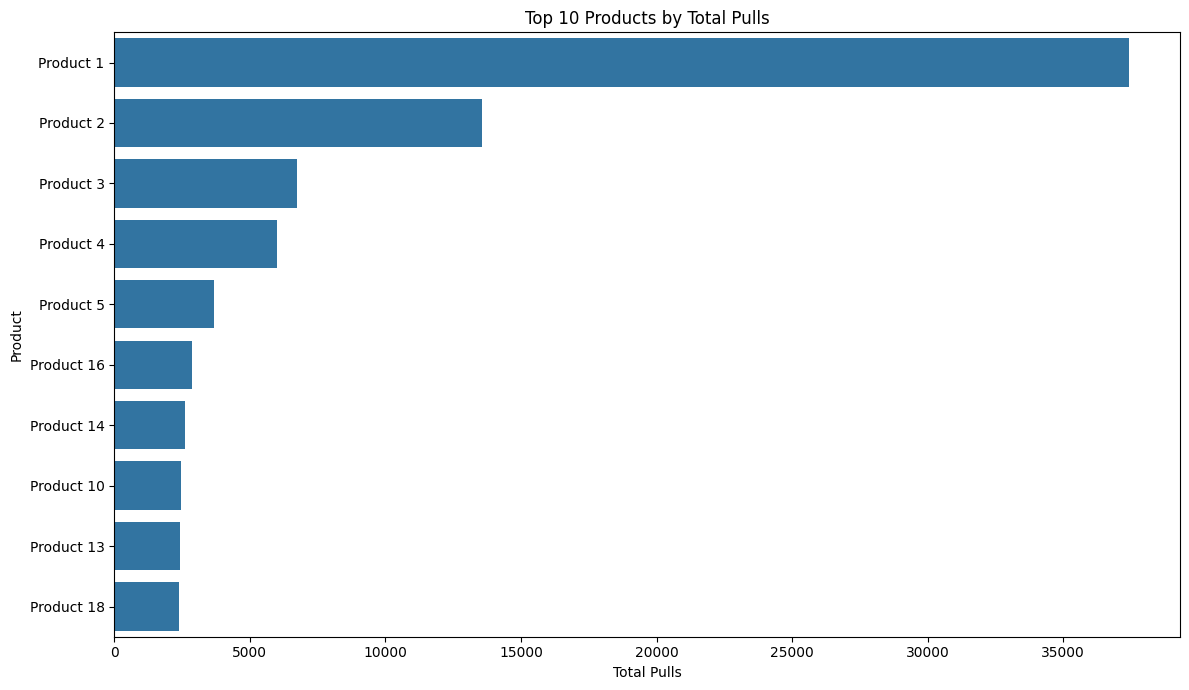

In [ ]:
# prompt: plot top 10 products with information of previous cell

# Plot the top 10 products
plt.figure(figsize=(12, 7))
sns.barplot(data=top_10_products, x='Total_Pulls', y='Product')
plt.title('Top 10 Products by Total Pulls')
plt.xlabel('Total Pulls')
plt.ylabel('Product')
plt.tight_layout()
plt.show()



# Pulls

In [ ]:
import pandas as pd

# Cargar el CSV completo
df = pd.read_csv('/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv')

# Asegurar tipo correcto
df['Data Change'] = pd.to_numeric(df['Data Change'], errors='coerce')

# Filtrar solo eventos de Pulls
pulls_df = df[df['Status'] == 'Possible Pull'].copy()

# Calcular Pulls globales (suma total del campo relevante)
total_global_pulls = pulls_df['Data Change'].sum()

# Agregar columna de Total Pulls por fila (equivalente a Data Change)
pulls_df['Total Pulls'] = pulls_df['Data Change']

# Calcular % Pulls (global) por fila
pulls_df['% Pulls (global)'] = (pulls_df['Total Pulls'] / total_global_pulls) * 100

# Guardar el CSV final con todas las columnas originales + cálculos
pulls_df.to_csv('/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/pulls_summary_full.csv', index=False)


from google.colab import files
files.download('/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/pulls_summary_full.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pulls_df

,Location Local Datetime,Location Id,Location,Deployment Id,Deployment,Placement Id,Placement,Product Id,Product,Metric,...,Product Fills,Prev_Data,Next_Data,Status,Date,DayOfWeek,HourOfDay,Month,Total Pulls,% Pulls (global)
9,2024-12-01 04:02:25.306,2680,Store A,3,Shelf 3,3,Shelf 3,1256,Product 1,ProductCount,...,0.0,8.0,6.0,Possible Pull,2024-12-01,Sunday,4,December,1.0,0.001018
11,2024-12-01 04:02:45.590,2680,Store A,5,Shelf 5,5,Shelf 5,1256,Product 1,ProductCount,...,0.0,10.0,7.0,Possible Pull,2024-12-01,Sunday,4,December,4.0,0.004071
13,2024-12-01 04:03:38.457,2680,Store A,3,Shelf 3,3,Shelf 3,1256,Product 1,ProductCount,...,0.0,7.0,5.0,Possible Pull,2024-12-01,Sunday,4,December,1.0,0.001018
15,2024-12-01 04:04:23.220,2680,Store A,1,Shelf 1,1,Shelf 1,1256,Product 1,ProductCount,...,0.0,7.0,10.0,Possible Pull,2024-12-01,Sunday,4,December,3.0,0.003053
16,2024-12-01 04:05:09.966,2680,Store A,4,Shelf 4,4,Shelf 4,1256,Product 1,ProductCount,...,0.0,9.0,5.0,Possible Pull,2024-12-01,Sunday,4,December,3.0,0.003053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113321,2025-04-28 07:22:10.745,2394,Store B,6,Shelf 6,6,Shelf 6,822,Product 8,ProductCount,...,0.0,33.0,34.0,Possible Pull,2025-04-28,Monday,7,April,1.0,0.001018
113324,2025-04-28 10:52:12.471,2394,Store B,7,Shelf 7,7,Shelf 7,822,Product 8,ProductCount,...,0.0,34.0,32.0,Possible Pull,2025-04-28,Monday,10,April,1.0,0.001018
113325,2025-04-28 11:02:12.430,2394,Store B,7,Shelf 7,7,Shelf 7,822,Product 8,ProductCount,...,0.0,33.0,34.0,Possible Pull,2025-04-28,Monday,11,April,1.0,0.001018
113344,2025-04-30 08:32:07.984,2394,Store B,7,Shelf 7,7,Shelf 7,822,Product 8,ProductCount,...,0.0,34.0,NaN,Possible Pull,2025-04-30,Wednesday,8,April,1.0,0.001018


tarjeta de total pull, pulls contributoin y plot de pie de locacion vs total

  Location  Total Pulls    % Pulls
0  Store A      96716.0  98.432666
1  Store B       1540.0   1.567334


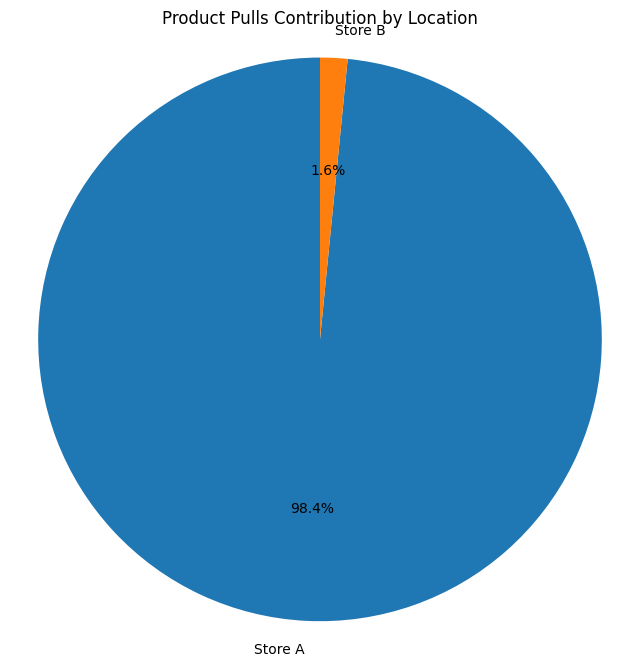

Total Pulls: 98256.0


In [ ]:
# prompt: top de products Id por locacion usando pulls_summary_full.csv, conservando todas las columnas

import pandas as pd
from google.colab import files

# Load the dataframe
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/pulls_summary_full.csv'
pulls_df = pd.read_csv(file_path)

# Group data by location and sum 'Total Pulls'
location_pulls = pulls_df.groupby('Location')['Total Pulls'].sum().reset_index()

# Calculate the percentage contribution of each location
location_pulls['% Pulls'] = (location_pulls['Total Pulls'] / location_pulls['Total Pulls'].sum()) * 100

# Sort by Total Pulls to display the largest contributions first
location_pulls = location_pulls.sort_values('Total Pulls', ascending=False)

# Display results
print(location_pulls)

# Create a pie chart of location vs. total pulls
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(location_pulls['Total Pulls'], labels=location_pulls['Location'], autopct='%1.1f%%', startangle=90)
plt.title('Product Pulls Contribution by Location')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Card of total pulls
total_pulls = pulls_df['Total Pulls'].sum()
print(f"Total Pulls: {total_pulls}")


## Top Sku by location

In [ ]:
# prompt: determinar los 10 priducto con más pulls de cada locacion con pulls_summary_full.csv

import pandas as pd

# Load the dataframe
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/pulls_summary_full.csv'
pulls_df = pd.read_csv(file_path)

# Group data by location and product, then sum 'Total Pulls'
location_product_pulls = pulls_df.groupby(['Location', 'Product'])['Total Pulls'].sum().reset_index()

# Sort within each location by 'Total Pulls' in descending order and get the top 10
top_10_products_by_location = location_product_pulls.groupby('Location').apply(
    lambda x: x.sort_values('Total Pulls', ascending=False).head(10)
).reset_index(drop=True)

top_10_products_by_location


<ipython-input-318-c02450cdd179>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_products_by_location = location_product_pulls.groupby('Location').apply(


,Location,Product,Total Pulls
0,Store A,Product 1,37434.0
1,Store A,Product 2,13570.0
2,Store A,Product 3,6740.0
3,Store A,Product 4,6004.0
4,Store A,Product 5,3692.0
5,Store A,Product 16,2877.0
6,Store A,Product 14,2615.0
7,Store A,Product 10,2462.0
8,Store A,Product 13,2409.0
9,Store A,Product 18,2389.0


<ipython-input-319-10f6d6c81ca9>:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_products_by_location = location_product_pulls.groupby('Location').apply(


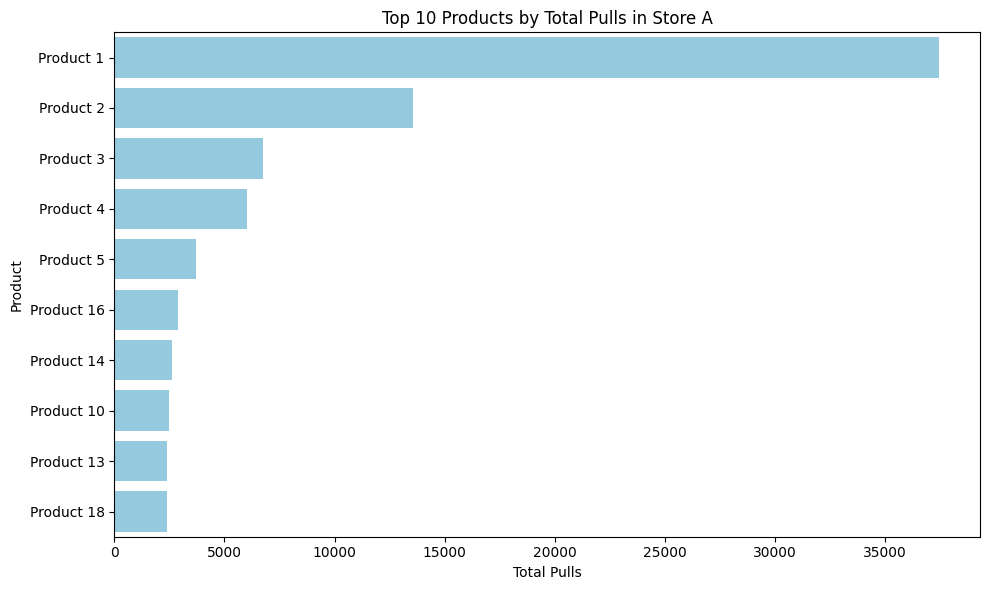

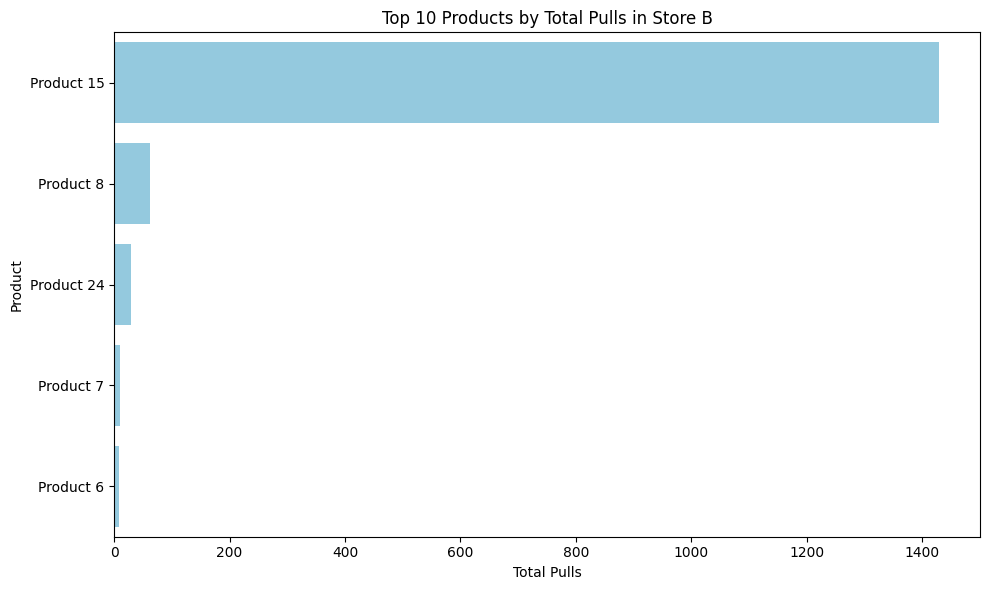

In [ ]:
# prompt: plot each top 10 by location in ascending with pulls_summary_full

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataframe
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/pulls_summary_full.csv'
pulls_df = pd.read_csv(file_path)

# Group data by location and product, then sum 'Total Pulls'
location_product_pulls = pulls_df.groupby(['Location', 'Product'])['Total Pulls'].sum().reset_index()

# Sort within each location by 'Total Pulls' in descending order and get the top 10
top_10_products_by_location = location_product_pulls.groupby('Location').apply(
    lambda x: x.sort_values('Total Pulls', ascending=False).head(10)
).reset_index(drop=True)

# Plotting
for location in top_10_products_by_location['Location'].unique():
    location_data = top_10_products_by_location[top_10_products_by_location['Location'] == location]
    plt.figure(figsize=(10, 6))
    sns.barplot(data=location_data, x='Total Pulls', y='Product', color="skyblue")
    plt.title(f'Top 10 Products by Total Pulls in {location}')
    plt.xlabel('Total Pulls')
    plt.ylabel('Product')
    plt.tight_layout()
    plt.show()


# Product velocity

In [ ]:
import pandas as pd

# Cargar datos
df = pd.read_csv('/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/pulls_summary_full.csv')

# Convertir a datetime
df['Location Local Datetime'] = pd.to_datetime(df['Location Local Datetime'], errors='coerce')

# 🔁 Filtros configurables
exclude_sundays = False
exclude_night_hours = False

if exclude_sundays:
    df = df[df['DayOfWeek'] != 6]

if exclude_night_hours:
    df = df[(df['Hour'] >= 6) & (df['Hour'] <= 22)]

# Calcular rango total de fechas del análisis
valid_dates = df['Location Local Datetime'].dt.date.dropna()
start_date = valid_dates.min()
end_date = valid_dates.max()
total_analysis_days = (end_date - start_date).days + 1

# Agrupar por producto para calcular métricas
summary = df.groupby('Product Id').agg(
    total_pulls=('Data Change', lambda x: x[df.loc[x.index, 'Status'] == 'Possible Pull'].sum()),
    total_fills=('Data Change', lambda x: x[df.loc[x.index, 'Status'] == 'Possible Fill'].sum()),
    days_with_data=('Location Local Datetime', lambda x: x.dt.date.nunique())
).reset_index()

# Calcular métricas derivadas
summary['pulls_percent'] = summary['total_pulls'] / summary['total_pulls'].sum()
summary['velocity_active_days'] = summary['total_pulls'] / summary['days_with_data']
summary['velocity_period'] = summary['total_pulls'] / total_analysis_days

# Renombrar columnas
summary = summary.rename(columns={
    'velocity_active_days': 'Product Velocity (Active Days)',
    'velocity_period': 'Product Velocity (Period)',
    'pulls_percent': '% Pulls'
})

# 🔁 Asegurar tipo consistente para el merge
df['Product Id'] = df['Product Id'].astype(str)
summary['Product Id'] = summary['Product Id'].astype(str)

# Hacer el merge para conservar todas las columnas originales
df_final = df.merge(summary, on='Product Id', how='left')

df_final

,Location Local Datetime,Location Id,Location,Deployment Id,Deployment,Placement Id,Placement,Product Id,Product,Metric,...,HourOfDay,Month,Total Pulls,% Pulls (global),total_pulls,total_fills,days_with_data,% Pulls,Product Velocity (Active Days),Product Velocity (Period)
0,2024-12-01 04:02:25.306,2680,Store A,3,Shelf 3,3,Shelf 3,1256,Product 1,ProductCount,...,4,December,1.0,0.001018,37434.0,0.0,149,0.380984,251.234899,246.276316
1,2024-12-01 04:02:45.590,2680,Store A,5,Shelf 5,5,Shelf 5,1256,Product 1,ProductCount,...,4,December,4.0,0.004071,37434.0,0.0,149,0.380984,251.234899,246.276316
2,2024-12-01 04:03:38.457,2680,Store A,3,Shelf 3,3,Shelf 3,1256,Product 1,ProductCount,...,4,December,1.0,0.001018,37434.0,0.0,149,0.380984,251.234899,246.276316
3,2024-12-01 04:04:23.220,2680,Store A,1,Shelf 1,1,Shelf 1,1256,Product 1,ProductCount,...,4,December,3.0,0.003053,37434.0,0.0,149,0.380984,251.234899,246.276316
4,2024-12-01 04:05:09.966,2680,Store A,4,Shelf 4,4,Shelf 4,1256,Product 1,ProductCount,...,4,December,3.0,0.003053,37434.0,0.0,149,0.380984,251.234899,246.276316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42535,2025-04-28 07:22:10.745,2394,Store B,6,Shelf 6,6,Shelf 6,822,Product 8,ProductCount,...,7,April,1.0,0.001018,62.0,0.0,20,0.000631,3.100000,0.407895
42536,2025-04-28 10:52:12.471,2394,Store B,7,Shelf 7,7,Shelf 7,822,Product 8,ProductCount,...,10,April,1.0,0.001018,62.0,0.0,20,0.000631,3.100000,0.407895
42537,2025-04-28 11:02:12.430,2394,Store B,7,Shelf 7,7,Shelf 7,822,Product 8,ProductCount,...,11,April,1.0,0.001018,62.0,0.0,20,0.000631,3.100000,0.407895
42538,2025-04-30 08:32:07.984,2394,Store B,7,Shelf 7,7,Shelf 7,822,Product 8,ProductCount,...,8,April,1.0,0.001018,62.0,0.0,20,0.000631,3.100000,0.407895


In [ ]:
# Cargar datos
df = pd.read_csv('/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/pulls_summary_full.csv')

# Asegurar tipos
df['Product Id'] = df['Product Id'].astype(str)
df['Location Local Datetime'] = pd.to_datetime(df['Location Local Datetime'], errors='coerce')

# Calcular rango total de días del análisis
valid_dates = df['Location Local Datetime'].dt.date.dropna()
start_date = valid_dates.min()
end_date = valid_dates.max()
total_analysis_days = (end_date - start_date).days + 1

# Agrupar por Product Id + Placement
summary = df.groupby(['Product Id', 'Placement']).agg(
    total_pulls=('Data Change', lambda x: x[df.loc[x.index, 'Status'] == 'Possible Pull'].sum()),
    total_fills=('Data Change', lambda x: x[df.loc[x.index, 'Status'] == 'Possible Fill'].sum()),
    days_with_data=('Location Local Datetime', lambda x: x.dt.date.nunique())
).reset_index()

# Calcular métricas derivadas
summary['pulls_percent'] = summary['total_pulls'] / summary['total_pulls'].sum()
summary['velocity_active_days'] = summary['total_pulls'] / summary['days_with_data']
summary['velocity_period'] = summary['total_pulls'] / total_analysis_days

# Renombrar columnas
summary = summary.rename(columns={
    'total_pulls': 'Total Pulls',
    'total_fills': 'Total Fills',
    'days_with_data': 'Days with Data',
    'velocity_active_days': 'Product Velocity (Active Days)',
    'velocity_period': 'Product Velocity (Period)',
    'pulls_percent': '% Pulls'
})

# Hacer merge para conservar todas las columnas
df['Product Id'] = df['Product Id'].astype(str)
summary['Product Id'] = summary['Product Id'].astype(str)

df_final = df.merge(summary, on=['Product Id', 'Placement'], how='left')


In [ ]:
import pandas as pd

# Cargar datos
df = pd.read_csv('/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/pulls_summary_full.csv')

# Convertir columnas clave
df['Product Id'] = df['Product Id'].astype(str)
df['Location Local Datetime'] = pd.to_datetime(df['Location Local Datetime'], errors='coerce')

# Filtros configurables
exclude_sundays = False
exclude_night_hours = False

if exclude_sundays:
    df = df[df['DayOfWeek'] != 6]

if exclude_night_hours:
    df = df[(df['Hour'] >= 6) & (df['Hour'] <= 22)]

# Calcular rango total de fechas del análisis
valid_dates = df['Location Local Datetime'].dt.date.dropna()
start_date = valid_dates.min()
end_date = valid_dates.max()
total_analysis_days = (end_date - start_date).days + 1

# Agrupar por Product Id y Placement
summary = df.groupby(['Product Id', 'Placement']).agg(
    Total_Pulls=('Data Change', lambda x: x[df.loc[x.index, 'Status'] == 'Possible Pull'].sum()),
    Total_Fills=('Data Change', lambda x: x[df.loc[x.index, 'Status'] == 'Possible Fill'].sum()),
    Days_with_Data=('Location Local Datetime', lambda x: x.dt.date.nunique())
).reset_index()

# Calcular métricas adicionales
summary['% Pulls'] = summary['Total_Pulls'] / summary['Total_Pulls'].sum()
summary['Product Velocity (Active Days)'] = summary['Total_Pulls'] / summary['Days_with_Data']
summary['Product Velocity (Period)'] = summary['Total_Pulls'] / total_analysis_days

# Evitar conflictos de columnas: eliminar si ya existen en df
for col in ['Total Pulls', 'Total Fills', 'Days with Data', '% Pulls', 'Product Velocity (Active Days)', 'Product Velocity (Period)']:
    if col in df.columns:
        df = df.drop(columns=[col])

# Hacer merge con todas las columnas originales
df_final = df.merge(summary, on=['Product Id', 'Placement'], how='left')

df_final

,Location Local Datetime,Location Id,Location,Deployment Id,Deployment,Placement Id,Placement,Product Id,Product,Metric,...,DayOfWeek,HourOfDay,Month,% Pulls (global),Total_Pulls,Total_Fills,Days_with_Data,% Pulls,Product Velocity (Active Days),Product Velocity (Period)
0,2024-12-01 04:02:25.306,2680,Store A,3,Shelf 3,3,Shelf 3,1256,Product 1,ProductCount,...,Sunday,4,December,0.001018,7300.0,0.0,148,0.074296,49.324324,48.026316
1,2024-12-01 04:02:45.590,2680,Store A,5,Shelf 5,5,Shelf 5,1256,Product 1,ProductCount,...,Sunday,4,December,0.004071,7484.0,0.0,149,0.076168,50.228188,49.236842
2,2024-12-01 04:03:38.457,2680,Store A,3,Shelf 3,3,Shelf 3,1256,Product 1,ProductCount,...,Sunday,4,December,0.001018,7300.0,0.0,148,0.074296,49.324324,48.026316
3,2024-12-01 04:04:23.220,2680,Store A,1,Shelf 1,1,Shelf 1,1256,Product 1,ProductCount,...,Sunday,4,December,0.003053,7557.0,0.0,149,0.076911,50.718121,49.717105
4,2024-12-01 04:05:09.966,2680,Store A,4,Shelf 4,4,Shelf 4,1256,Product 1,ProductCount,...,Sunday,4,December,0.003053,7804.0,0.0,149,0.079425,52.375839,51.342105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42535,2025-04-28 07:22:10.745,2394,Store B,6,Shelf 6,6,Shelf 6,822,Product 8,ProductCount,...,Monday,7,April,0.001018,5.0,0.0,4,0.000051,1.250000,0.032895
42536,2025-04-28 10:52:12.471,2394,Store B,7,Shelf 7,7,Shelf 7,822,Product 8,ProductCount,...,Monday,10,April,0.001018,17.0,0.0,12,0.000173,1.416667,0.111842
42537,2025-04-28 11:02:12.430,2394,Store B,7,Shelf 7,7,Shelf 7,822,Product 8,ProductCount,...,Monday,11,April,0.001018,17.0,0.0,12,0.000173,1.416667,0.111842
42538,2025-04-30 08:32:07.984,2394,Store B,7,Shelf 7,7,Shelf 7,822,Product 8,ProductCount,...,Wednesday,8,April,0.001018,17.0,0.0,12,0.000173,1.416667,0.111842


## Product and cooler verification

In [ ]:

# Filter the DataFrame for the specific product ID, location, and status
filtered_df = df_final[
    (df_final['Location'] == 'Store A') &
    (df_final['Status'] == 'Possible Pull')
]

# Group by 'Deployment' and calculate the sum of 'Data Change' (pulls)
pulls_by_deployment = filtered_df.groupby('Deployment')['Data Change'].sum().reset_index()

# Rename the columns for clarity
pulls_by_deployment = pulls_by_deployment.rename(
    columns={'Data Change': 'Total Pulls for Product 1256'}
)

# Calculate 'Product Velocity (Active Days)' and 'Product Velocity (Period)' for this filtered data
# Need to recalculate these velocities based on the filtered data, as the columns from the merge are based on the full dataset.
# First, group by Deployment and calculate the number of active days with data
active_days_by_deployment = filtered_df.groupby('Deployment')['Location Local Datetime'].apply(lambda x: x.dt.date.nunique()).reset_index()
active_days_by_deployment = active_days_by_deployment.rename(columns={'Location Local Datetime': 'Days with Data'})

# Merge the pulls and active days
velocity_by_deployment = pulls_by_deployment.merge(active_days_by_deployment, on='Deployment', how='left')

# Calculate Product Velocity (Active Days)
velocity_by_deployment['Product Velocity (Active Days)'] = velocity_by_deployment['Total Pulls for Product 1256'] / velocity_by_deployment['Days with Data']

# Calculate Product Velocity (Period) - Need the total analysis days again for the filtered subset
if not filtered_df['Location Local Datetime'].empty:
    valid_dates_filtered = filtered_df['Location Local Datetime'].dt.date.dropna()
    if not valid_dates_filtered.empty:
        start_date_filtered = valid_dates_filtered.min()
        end_date_filtered = valid_dates_filtered.max()
        total_analysis_days_filtered = (end_date_filtered - start_date_filtered).days + 1
    else:
        total_analysis_days_filtered = 0
else:
    total_analysis_days_filtered = 0


velocity_by_deployment['Product Velocity (Period)'] = velocity_by_deployment['Total Pulls for Product 1256'] / total_analysis_days_filtered

# Display the result
velocity_by_deployment


,Deployment,Total Pulls for Product 1256,Days with Data,Product Velocity (Active Days),Product Velocity (Period)
0,Shelf 1,19432.0,149,130.416107,127.842105
1,Shelf 2,18777.0,149,126.020134,123.532895
2,Shelf 3,19088.0,149,128.107383,125.578947
3,Shelf 4,19787.0,149,132.798658,130.177632
4,Shelf 5,19632.0,149,131.758389,129.157895


## Product Verification

In [ ]:
# prompt: ver todos los datos de prpoducto 1256 del dt_final

dt_final = df_final # Asignar df_final a dt_final para que coincida con la solicitud

# Filtrar el DataFrame dt_final para mostrar todas las filas donde 'Product Id' es 1256
producto_1_data = dt_final[dt_final['Product'] == 'Product 1']

# Imprimir los datos del producto 1256
producto_1_data


,Location Local Datetime,Location Id,Location,Deployment Id,Deployment,Placement Id,Placement,Product Id,Product,Metric,...,DayOfWeek,HourOfDay,Month,% Pulls (global),Total_Pulls,Total_Fills,Days_with_Data,% Pulls,Product Velocity (Active Days),Product Velocity (Period)
0,2024-12-01 04:02:25.306,2680,Store A,3,Shelf 3,3,Shelf 3,1256,Product 1,ProductCount,...,Sunday,4,December,0.001018,7300.0,0.0,148,0.074296,49.324324,48.026316
1,2024-12-01 04:02:45.590,2680,Store A,5,Shelf 5,5,Shelf 5,1256,Product 1,ProductCount,...,Sunday,4,December,0.004071,7484.0,0.0,149,0.076168,50.228188,49.236842
2,2024-12-01 04:03:38.457,2680,Store A,3,Shelf 3,3,Shelf 3,1256,Product 1,ProductCount,...,Sunday,4,December,0.001018,7300.0,0.0,148,0.074296,49.324324,48.026316
3,2024-12-01 04:04:23.220,2680,Store A,1,Shelf 1,1,Shelf 1,1256,Product 1,ProductCount,...,Sunday,4,December,0.003053,7557.0,0.0,149,0.076911,50.718121,49.717105
4,2024-12-01 04:05:09.966,2680,Store A,4,Shelf 4,4,Shelf 4,1256,Product 1,ProductCount,...,Sunday,4,December,0.003053,7804.0,0.0,149,0.079425,52.375839,51.342105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13955,2025-05-01 01:26:38.454,2680,Store A,2,Shelf 2,2,Shelf 2,1256,Product 1,ProductCount,...,Thursday,1,May,0.002035,7289.0,0.0,149,0.074184,48.919463,47.953947
13956,2025-05-01 01:38:10.452,2680,Store A,4,Shelf 4,4,Shelf 4,1256,Product 1,ProductCount,...,Thursday,1,May,0.002035,7804.0,0.0,149,0.079425,52.375839,51.342105
13957,2025-05-01 01:48:10.423,2680,Store A,5,Shelf 5,5,Shelf 5,1256,Product 1,ProductCount,...,Thursday,1,May,0.002035,7484.0,0.0,149,0.076168,50.228188,49.236842
13958,2025-05-01 03:36:38.157,2680,Store A,2,Shelf 2,2,Shelf 2,1256,Product 1,ProductCount,...,Thursday,3,May,0.001018,7289.0,0.0,149,0.074184,48.919463,47.953947


In [ ]:
total_analysis_days


152

In [ ]:
print(f"Start date from Python: {start_date}")
print(f"End date from Python: {end_date}")

Start date from Python: 2024-12-01
End date from Python: 2025-05-01


## Cooler verification

In [ ]:
# prompt: product velocity by cooler

# Cargar datos
df = pd.read_csv('/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/pulls_summary_full.csv')

# Convertir a datetime
df['Location Local Datetime'] = pd.to_datetime(df['Location Local Datetime'], errors='coerce')

# 🔁 Filtros configurables
exclude_sundays = False
exclude_night_hours = False

if exclude_sundays:
    df = df[df['DayOfWeek'] != 6]

if exclude_night_hours:
    df = df[(df['HourOfDay'] >= 6) & (df['HourOfDay'] <= 22)] # Use HourOfDay column

# Calcular rango total de fechas del análisis
valid_dates = df['Location Local Datetime'].dt.date.dropna()
start_date = valid_dates.min()
end_date = valid_dates.max()
total_analysis_days = (end_date - start_date).days + 1

# Agrupar por Deployment (Cooler) para calcular métricas
summary_cooler = df.groupby('Deployment').agg(
    total_pulls=('Data Change', lambda x: x[df.loc[x.index, 'Status'] == 'Possible Pull'].sum()),
    total_fills=('Data Change', lambda x: x[df.loc[x.index, 'Status'] == 'Possible Fill'].sum()),
    days_with_data=('Location Local Datetime', lambda x: x.dt.date.nunique())
).reset_index()

# Calcular métricas derivadas
summary_cooler['pulls_percent'] = summary_cooler['total_pulls'] / summary_cooler['total_pulls'].sum()
summary_cooler['velocity_active_days'] = summary_cooler['total_pulls'] / summary_cooler['days_with_data']
summary_cooler['velocity_period'] = summary_cooler['total_pulls'] / total_analysis_days

# Renombrar columnas
summary_cooler = summary_cooler.rename(columns={
    'velocity_active_days': 'Cooler Velocity (Active Days)',
    'velocity_period': 'Cooler Velocity (Period)',
    'pulls_percent': '% Pulls (Cooler)'
})

# 🔁 Asegurar tipo consistente para el merge
df['Deployment'] = df['Deployment'].astype(str)
summary_cooler['Deployment'] = summary_cooler['Deployment'].astype(str)

# Hacer el merge para conservar todas las columnas originales
df_final_cooler = df.merge(summary_cooler, on='Deployment', how='left')

df_final_cooler


,Location Local Datetime,Location Id,Location,Deployment Id,Deployment,Placement Id,Placement,Product Id,Product,Metric,...,HourOfDay,Month,Total Pulls,% Pulls (global),total_pulls,total_fills,days_with_data,% Pulls (Cooler),Cooler Velocity (Active Days),Cooler Velocity (Period)
0,2024-12-01 04:02:25.306,2680,Store A,3,Shelf 3,3,Shelf 3,1256,Product 1,ProductCount,...,4,December,1.0,0.001018,19088.0,0.0,149,0.194268,128.107383,125.578947
1,2024-12-01 04:02:45.590,2680,Store A,5,Shelf 5,5,Shelf 5,1256,Product 1,ProductCount,...,4,December,4.0,0.004071,19632.0,0.0,149,0.199805,131.758389,129.157895
2,2024-12-01 04:03:38.457,2680,Store A,3,Shelf 3,3,Shelf 3,1256,Product 1,ProductCount,...,4,December,1.0,0.001018,19088.0,0.0,149,0.194268,128.107383,125.578947
3,2024-12-01 04:04:23.220,2680,Store A,1,Shelf 1,1,Shelf 1,1256,Product 1,ProductCount,...,4,December,3.0,0.003053,19432.0,0.0,149,0.197769,130.416107,127.842105
4,2024-12-01 04:05:09.966,2680,Store A,4,Shelf 4,4,Shelf 4,1256,Product 1,ProductCount,...,4,December,3.0,0.003053,19787.0,0.0,149,0.201382,132.798658,130.177632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42535,2025-04-28 07:22:10.745,2394,Store B,6,Shelf 6,6,Shelf 6,822,Product 8,ProductCount,...,7,April,1.0,0.001018,310.0,0.0,88,0.003155,3.522727,2.039474
42536,2025-04-28 10:52:12.471,2394,Store B,7,Shelf 7,7,Shelf 7,822,Product 8,ProductCount,...,10,April,1.0,0.001018,303.0,0.0,98,0.003084,3.091837,1.993421
42537,2025-04-28 11:02:12.430,2394,Store B,7,Shelf 7,7,Shelf 7,822,Product 8,ProductCount,...,11,April,1.0,0.001018,303.0,0.0,98,0.003084,3.091837,1.993421
42538,2025-04-30 08:32:07.984,2394,Store B,7,Shelf 7,7,Shelf 7,822,Product 8,ProductCount,...,8,April,1.0,0.001018,303.0,0.0,98,0.003084,3.091837,1.993421


In [ ]:
# Filter for the specified location and status
location_cooler_pulls = df_final_cooler[
    (df_final_cooler['Location'] == 'Store A') &
    (df_final_cooler['Status'] == 'Possible Pull')
].copy()

# Group by Deployment (Cooler) and calculate the sum of 'Data Change' (pulls)
cooler_pulls_summary = location_cooler_pulls.groupby('Deployment').agg(
    Total_Pulls=('Data Change', 'sum'),
    Days_with_Data=('Location Local Datetime', lambda x: x.dt.date.nunique())
).reset_index()

# Calculate the total analysis days for the filtered location
if not location_cooler_pulls['Location Local Datetime'].empty:
    valid_dates_location = location_cooler_pulls['Location Local Datetime'].dt.date.dropna()
    if not valid_dates_location.empty:
        start_date_location = valid_dates_location.min()
        end_date_location = valid_dates_location.max()
        total_analysis_days_location = (end_date_location - start_date_location).days + 1
    else:
        total_analysis_days_location = 0
else:
    total_analysis_days_location = 0


# Calculate Product Velocity (Active Days) and (Period)
cooler_pulls_summary['Cooler Velocity (Active Days)'] = cooler_pulls_summary['Total_Pulls'] / cooler_pulls_summary['Days_with_Data']
# Handle potential division by zero for Product Velocity (Period) if total_analysis_days_location is 0
cooler_pulls_summary['Cooler Velocity (Period)'] = cooler_pulls_summary['Total_Pulls'] / total_analysis_days_location if total_analysis_days_location > 0 else 0


# Display the results
cooler_pulls_summary


,Deployment,Total_Pulls,Days_with_Data,Cooler Velocity (Active Days),Cooler Velocity (Period)
0,Shelf 1,19432.0,149,130.416107,127.842105
1,Shelf 2,18777.0,149,126.020134,123.532895
2,Shelf 3,19088.0,149,128.107383,125.578947
3,Shelf 4,19787.0,149,132.798658,130.177632
4,Shelf 5,19632.0,149,131.758389,129.157895


In [ ]:
# prompt: ver product velocity de product id 1256 en cooler Main Cafe - Cooler 3

# Filter the DataFrame for the specific product ID, location, and cooler
filtered_df_specific = df_final[
    (df_final['Location'] == 'Store A') &
    (df_final['Deployment'] == 'Shelf 1 - Store A') &
    (df_final['Status'] == 'Possible Pull')
].copy()

# Calculate the sum of 'Data Change' (pulls) for this specific filter
total_pulls_specific = filtered_df_specific['Data Change'].sum()

# Calculate the number of unique days with data for this specific filter
active_days_specific = filtered_df_specific['Location Local Datetime'].dt.date.nunique()

# Calculate the total analysis days for this specific filtered subset
if not filtered_df_specific['Location Local Datetime'].empty:
    valid_dates_specific = filtered_df_specific['Location Local Datetime'].dt.date.dropna()
    if not valid_dates_specific.empty:
        start_date_specific = valid_dates_specific.min()
        end_date_specific = valid_dates_specific.max()
        total_analysis_days_specific = (end_date_specific - start_date_specific).days + 1
    else:
        total_analysis_days_specific = 0
else:
    total_analysis_days_specific = 0

# Calculate the Product Velocity (Active Days) for the specific filter
product_velocity_active_specific = total_pulls_specific / active_days_specific if active_days_specific > 0 else 0

# Calculate the Product Velocity (Period) for the specific filter
product_velocity_period_specific = total_pulls_specific / total_analysis_days_specific if total_analysis_days_specific > 0 else 0

# Display the results
print(f"Location: Store A, Shelf 1")
print(f"Total Pulls: {total_pulls_specific}")
print(f"Product Velocity (Active Days): {product_velocity_active_specific:.2f}")
print(f"Product Velocity (Period): {product_velocity_period_specific:.2f}")

Location: Store A, Shelf 1
Total Pulls: 0.0
Product Velocity (Active Days): 0.00
Product Velocity (Period): 0.00


# Restocking

## General

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# File path
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
restock_df = pd.read_csv(file_path)

# Convert the 'Location Local Datetime' to a datetime object and extract the date
restock_df['Location Local Datetime'] = pd.to_datetime(restock_df['Location Local Datetime'])
restock_df['Date'] = restock_df['Location Local Datetime'].dt.date


# Step 1: Get the first and last timestamp in the entire dataset (entire dataset timeframe)
first_date = restock_df['Location Local Datetime'].min()
last_date = restock_df['Location Local Datetime'].max()
total_days_in_dataset = (last_date - first_date).days + 1  # Add 1 to include both first and last day

# Step 2: Filter for restocking events ('Possible Fill')
restocking_df = restock_df[restock_df['Status'] == 'Possible Fill']

# Sort the restocking data by Location Id, Brand, and Date for proper sequential analysis
restocking_df = restocking_df.sort_values(by=['Location Id', 'Location', 'Location Local Datetime'])

# Step 3: Calculate the time difference between consecutive restocking events
restocking_df['Time Between Restocks'] = restocking_df.groupby(['Location Id','Location'])['Location Local Datetime'].diff()

# Step 4: Calculate average time between restocking events for each Location Id and Brand
average_restock_time = restocking_df.groupby(['Location Id','Location'])['Time Between Restocks'].mean().reset_index()

# Step 5: Calculate total number of restocking incidents and total quantity of products restocked
restocking_counts = restocking_df.groupby(['Location Id','Location']).size().reset_index(name='Restocking Count')
total_products_restocked = restocking_df.groupby(['Location Id','Location'])['Data Change'].sum().reset_index(name='Total Products Restocked')

# Step 6: Merge the restocking counts and total products with the average restocking time
restocking_summary = pd.merge(average_restock_time, restocking_counts, on=['Location Id','Location'])
restocking_summary = pd.merge(restocking_summary, total_products_restocked, on=['Location Id','Location'])

# Step 7: Calculate the restocking frequency (events per day) and the average daily products restocked
restocking_summary['Restocking Frequency (per day)'] = restocking_summary['Restocking Count'] / total_days_in_dataset #Avg Daily Restocking Incidents
restocking_summary['Avg Daily Products Restocked'] = restocking_summary['Total Products Restocked'] / total_days_in_dataset

# Convert 'Time Between Restocks' to a float in terms of days
restocking_summary['Avg Time Between Restocks (hours)'] = restocking_summary['Time Between Restocks'].dt.total_seconds() / 3600

# Step 8: Reuse the previous calculation for average daily pulls
pulls_df = restock_df[restock_df['Status'] == 'Possible Pull']

# Group by Location Id, Brand, and Date, then calculate the sum of pulls for each day
daily_pulls = pulls_df.groupby(['Location Id', 'Location', 'Date'])['Data Change'].sum().reset_index()

# Step 9: Calculate the total pulls for each Location Id and Brand
total_pulls = daily_pulls.groupby(['Location Id','Location'])['Data Change'].sum().reset_index()

# Step 10: Calculate the average daily pulls by dividing total pulls by the total number of days in the dataset
total_pulls['Avg Daily Pulls'] = total_pulls['Data Change'] / total_days_in_dataset

# Step 11: Merge the avg daily pulls with the restocking summary
restocking_summary = pd.merge(restocking_summary, total_pulls[['Location Id','Location', 'Avg Daily Pulls']], on=['Location Id','Location'], how='left')

# Step 12: Add total restock incidents and total products restocked columns to the final DataFrame
restocking_summary['Total Restock Incidents'] = restocking_summary['Restocking Count']
restocking_summary['Total Products Restocked'] = restocking_summary['Total Products Restocked']

# Reorder columns to include total restocks and products restocked
restocking_summary = restocking_summary[['Location Id', 'Location','Total Restock Incidents', 'Total Products Restocked',
                                         'Time Between Restocks', 'Avg Time Between Restocks (hours)',
                                         'Restocking Frequency (per day)', 'Avg Daily Products Restocked', 'Avg Daily Pulls']]

loc_restocking_summary = restocking_summary

output_path = "/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/loc_restocking_summary.csv"
loc_restocking_summary.to_csv(output_path, index=False)

files.download(output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
loc_restocking_summary


,Location Id,Location,Total Restock Incidents,Total Products Restocked,Time Between Restocks,Avg Time Between Restocks (hours),Restocking Frequency (per day),Avg Daily Products Restocked,Avg Daily Pulls
0,2394,Store B,723,1991.0,0 days 04:59:41.364098337,4.994823,4.756579,13.098684,10.131579
1,2680,Store A,40365,97747.0,0 days 00:05:23.186934074,0.089774,265.559211,643.072368,636.289474


## Sku, cooler, location

In [ ]:
import pandas as pd

# Load and preprocess
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
df = pd.read_csv(file_path)
df['Location Local Datetime'] = pd.to_datetime(df['Location Local Datetime'])
df['Date'] = df['Location Local Datetime'].dt.date


# Dataset date range
first_date = df['Location Local Datetime'].min()
last_date = df['Location Local Datetime'].max()
total_days = (last_date - first_date).days + 1

# Filter restocking events
restocking_df = df[df['Status'] == 'Possible Fill'].copy()
restocking_df = restocking_df.sort_values(by=[
    'Product Id', 'Location Id', 'Deployment Id', 'Location Local Datetime'
])

# Time between restocks
restocking_df['Time Between Restocks'] = restocking_df.groupby(
    ['Product Id', 'Location Id', 'Deployment Id']
)['Location Local Datetime'].diff()

# Aggregations
avg_time = restocking_df.groupby(
    ['Product Id', 'Product', 'Location Id', 'Location', 'Deployment Id', 'Deployment']
)['Time Between Restocks'].mean().reset_index()

count_events = restocking_df.groupby(
    ['Product Id', 'Product', 'Location Id', 'Location', 'Deployment Id', 'Deployment']
).size().reset_index(name='Restocking Count')

total_restocked = restocking_df.groupby(
    ['Product Id', 'Product', 'Location Id', 'Location', 'Deployment Id', 'Deployment']
)['Data Change'].sum().reset_index(name='Total Products Restocked')

# Merge summary
summary = avg_time.merge(count_events, on=['Product Id', 'Product', 'Location Id', 'Location', 'Deployment Id', 'Deployment'])
summary = summary.merge(total_restocked, on=['Product Id', 'Product', 'Location Id', 'Location', 'Deployment Id', 'Deployment'])

# Add calculated metrics
summary['Restocking Frequency (per day)'] = summary['Restocking Count'] / total_days
summary['Avg Daily Products Restocked'] = summary['Total Products Restocked'] / total_days
summary['Avg Time Between Restocks (hours)'] = summary['Time Between Restocks'].dt.total_seconds() / 3600

# Pulls
pulls_df = df[df['Status'] == 'Possible Pull'].copy()
daily_pulls = pulls_df.groupby([
    'Product Id', 'Location Id', 'Deployment Id', 'Date'
])['Data Change'].sum().reset_index()

total_pulls = daily_pulls.groupby([
    'Product Id', 'Location Id', 'Deployment Id'
])['Data Change'].sum().reset_index().rename(columns={"Data Change": "Total Pulls"})

total_pulls["Avg Daily Pulls"] = total_pulls["Total Pulls"] / total_days

# Merge pulls into summary
summary = summary.merge(
    total_pulls[['Product Id', 'Location Id', 'Deployment Id', 'Total Pulls','Avg Daily Pulls']],
    on=['Product Id', 'Location Id', 'Deployment Id'],
    how='left'
)

# Rename and reorder columns
summary = summary.rename(columns={
    'Restocking Count': 'Total Restock Incidents'
})

summary = summary[[
    'Product Id', 'Product',
    'Location Id', 'Location',
    'Deployment Id', 'Deployment',
    'Total Restock Incidents', 'Total Products Restocked',
    'Time Between Restocks', 'Avg Time Between Restocks (hours)',
    'Restocking Frequency (per day)', 'Avg Daily Products Restocked',
    'Total Pulls',
    'Avg Daily Pulls'
]]

# Export
output_file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/restocking_summary.csv'
summary.to_csv(output_file_path, index=False)

restocking_summary = summary

from google.colab import files
files.download(output_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
restocking_summary

,Product Id,Product,Location Id,Location,Deployment Id,Deployment,Total Restock Incidents,Total Products Restocked,Time Between Restocks,Avg Time Between Restocks (hours),Restocking Frequency (per day),Avg Daily Products Restocked,Total Pulls,Avg Daily Pulls
0,822,Product 8,2394,Store B,6,Shelf 6,8,33.0,4 days 06:18:25.665285714,102.307129,0.052632,0.217105,5.0,0.032895
1,822,Product 8,2394,Store B,7,Shelf 7,16,43.0,1 days 19:17:56.563333333,43.299045,0.105263,0.282895,17.0,0.111842
2,822,Product 8,2394,Store B,8,Shelf 8,15,42.0,1 days 20:34:13.405500,44.570390,0.098684,0.276316,21.0,0.138158
3,822,Product 8,2394,Store B,9,Shelf 9,7,33.0,4 days 21:48:09.645333333,117.802679,0.046053,0.217105,5.0,0.032895
4,822,Product 8,2394,Store B,10,Shelf 10,17,41.0,1 days 20:48:41.300375,44.811472,0.111842,0.269737,14.0,0.092105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1308,Product 12,2680,Store A,1,Shelf 1,184,382.0,0 days 19:36:09.964284153,19.602768,1.210526,2.513158,351.0,2.309211
121,1308,Product 12,2680,Store A,2,Shelf 2,157,360.0,0 days 23:07:10.139967948,23.119483,1.032895,2.368421,359.0,2.361842
122,1308,Product 12,2680,Store A,3,Shelf 3,174,388.0,0 days 20:50:37.583947976,20.843773,1.144737,2.552632,384.0,2.526316
123,1308,Product 12,2680,Store A,4,Shelf 4,171,359.0,0 days 21:09:41.786976470,21.161607,1.125000,2.361842,348.0,2.289474


### Top sku general validation

In [ ]:
# prompt: filtrar restoking_summary para product id 1256

restocking_summary_1256 = restocking_summary[restocking_summary['Product Id'] == 25]
restocking_summary_1256


,Product Id,Product,Location Id,Location,Deployment Id,Deployment,Total Restock Incidents,Total Products Restocked,Time Between Restocks,Avg Time Between Restocks (hours),Restocking Frequency (per day),Avg Daily Products Restocked,Total Pulls,Avg Daily Pulls


In [ ]:
# prompt: MEAN de cada metrica de restocking_summary_1256

restocking_summary_1256[['Total Restock Incidents', 'Total Products Restocked', 'Avg Time Between Restocks (hours)', 'Restocking Frequency (per day)', 'Avg Daily Products Restocked', 'Total Pulls', 'Avg Daily Pulls']].mean()


,0
Total Restock Incidents,NaN
Total Products Restocked,NaN
Avg Time Between Restocks (hours),NaN
Restocking Frequency (per day),NaN
Avg Daily Products Restocked,NaN
Total Pulls,NaN
Avg Daily Pulls,NaN


### Cooler validation

In [ ]:
# prompt: resumen en tabla donde se vean metricas de restoking_summary por cooler en general en la locacion compass group hq
import pandas as pd
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/restocking_summary.csv'
restocking_summary = pd.read_csv(file_path)
# Filter for the specific location
compass_group_hq_restocking = restocking_summary[restocking_summary['Location'] == 'Store A']

# Group by Deployment (Cooler) and calculate the sum of Total Pulls and Total Products Restocked
# Also calculate the mean of the time-based metrics for each cooler
cooler_restock_overview = compass_group_hq_restocking.groupby('Deployment').agg(
    Total_Pulls=('Total Pulls', 'sum'),
    Total_Products_Restocked=('Total Products Restocked', 'sum'),
    Total_Restock_Incidents=('Total Restock Incidents', 'sum'),
    Avg_Time_Between_Restocks_hours=('Avg Time Between Restocks (hours)', 'mean'),
    Restocking_Frequency_per_day=('Restocking Frequency (per day)', 'mean'),
    Avg_Daily_Products_Restocked=('Avg Daily Products Restocked', 'mean'),
    Avg_Daily_Pulls=('Avg Daily Pulls', 'mean')
).reset_index()

# Rename columns for clarity in the final table
cooler_restock_overview = cooler_restock_overview.rename(columns={
    'Deployment': 'Cooler',
    'Total_Pulls': 'Total Pulls',
    'Total_Products_Restocked': 'Total Products Restocked',
    'Total_Restock_Incidents': 'Total Restock Incidents',
    'Avg_Time_Between_Restocks_hours': 'Avg Time Between Restocks (hours)',
    'Restocking_Frequency_per_day': 'Restocking Frequency (per day)',
    'Avg_Daily_Products_Restocked': 'Avg Daily Products Restocked',
    'Avg_Daily_Pulls': 'Avg Daily Pulls'
})

# Display the resulting table
cooler_restock_overview


,Cooler,Total Pulls,Total Products Restocked,Total Restock Incidents,Avg Time Between Restocks (hours),Restocking Frequency (per day),Avg Daily Products Restocked,Avg Daily Pulls
0,Shelf 1,19432.0,19790.0,8237,18.062941,2.709539,6.509868,6.392105
1,Shelf 2,18777.0,19095.0,7861,19.012005,2.585855,6.281250,6.176645
2,Shelf 3,19088.0,19289.0,7983,18.357532,2.625987,6.345066,6.278947
3,Shelf 4,19787.0,19936.0,8069,18.385911,2.654276,6.557895,6.508882
4,Shelf 5,19632.0,19637.0,8215,18.403504,2.702303,6.459539,6.457895


# OOS

## General

In [ ]:
import pandas as pd
from google.colab import files

# Cargar datos
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
df = pd.read_csv(file_path)

# Convertir a datetime
df['Location Local Datetime'] = pd.to_datetime(df['Location Local Datetime'], errors='coerce')
df['Date'] = df['Location Local Datetime'].dt.date

# Rango total de días en el dataset
first_date = df['Location Local Datetime'].min()
last_date = df['Location Local Datetime'].max()
total_days_in_dataset = (last_date - first_date).days + 1

# Filtrar solo eventos de 'possible pull' con data = 0 (inicio de OOS) y 'possible fill' (fin de OOS)
df = df[df['Status'].isin(['Possible Pull', 'Possible Fill'])].copy()
df = df.sort_values(by=['Location Id', 'Location', 'Location Local Datetime'])

# Crear columna que identifique eventos de OOS (cuando Data == 0 y Status == 'Possible Pull')
df['Is OOS'] = (df['Data'] == 0) & (df['Status'] == 'Possible Pull')

# Inicializar lista para almacenar incidentes
oos_records = []

# Agrupar por ubicación
for (loc_id, loc_name), group in df.groupby(['Location Id', 'Location']):
    group = group.reset_index(drop=True)
    oos_active = False
    oos_start_time = None

    for idx, row in group.iterrows():
        if not oos_active and row['Is OOS']:
            oos_active = True
            oos_start_time = row['Location Local Datetime']

        elif oos_active and row['Status'] == 'Possible Fill':
            oos_end_time = row['Location Local Datetime']
            duration = (oos_end_time - oos_start_time).total_seconds() / 3600  # duración en horas
            oos_records.append({
                'Location Id': loc_id,
                'Location': loc_name,
                'OOS Start': oos_start_time,
                'OOS End': oos_end_time,
                'Duration Hours': duration
            })
            oos_active = False

# Crear DataFrame de incidentes OOS
oos_df = pd.DataFrame(oos_records)

# Calcular métricas por ubicación
summary = oos_df.groupby(['Location Id', 'Location']).agg(
    Total_OOS_Incidents=('Duration Hours', 'count'),
    Total_OOS_duration_hours=('Duration Hours', 'sum'),
    Avg_OOS_Duration_Hours=('Duration Hours', 'mean')
).reset_index()

summary['OOS_Frequency_per_day'] = summary['Total_OOS_Incidents'] / total_days_in_dataset

# Renombrar columnas para consistencia
summary = summary.rename(columns={
    'Total_OOS_Incidents': 'Total OOS Incidents',
    'Avg_OOS_Duration_Hours': 'Avg OOS Duration (hours)',
    'Total_OOS_duration_hours': 'Total OOS Duration (hours)',
    'OOS_Frequency_per_day': 'OOS Frequency (per day)'
})


# Guardar resultado
output_path = "/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/loc_oos_summary.csv"
summary.to_csv(output_path, index=False)

files.download(output_path)


loc_oos_summary = summary


loc_oos_summary




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Location Id,Location,Total OOS Incidents,Total OOS Duration (hours),Avg OOS Duration (hours),OOS Frequency (per day)
0,2394,Store B,4,33.002721,8.250680,0.026316
1,2680,Store A,3298,226.963566,0.068819,21.697368


## SKU, cooler, location

In [ ]:
import pandas as pd

# Load data
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data_transform/modified_real_pulls_1.csv'
df = pd.read_csv(file_path)
df['Location Local Datetime'] = pd.to_datetime(df['Location Local Datetime'])
df['Date'] = df['Location Local Datetime'].dt.date

# Dataset time range
first_date = df['Location Local Datetime'].min()
last_date = df['Location Local Datetime'].max()
total_days = (last_date - first_date).days + 1

# --- OOS Metrics Calculation ---

# Filter only relevant events
oos_df = df[df['Status'].isin(['Possible Pull', 'Possible Fill'])].copy()
oos_df = oos_df.sort_values(by=['Product Id', 'Location Id', 'Deployment Id', 'Location Local Datetime'])

# Identify potential OOS starts (Data == 0 and Status == Possible Pull)
oos_df['Is_OOS_Start'] = (oos_df['Data'] == 0) & (oos_df['Status'] == 'Possible Pull')

# Initialize list for OOS events
oos_records = []

# Group by Product, Location, Deployment
for (prod_id, loc_id, depl_id), group in oos_df.groupby(['Product Id', 'Location Id', 'Deployment Id']):
    group = group.reset_index(drop=True)
    product = group['Product'].iloc[0] if 'Product' in group.columns else None
    location = group['Location'].iloc[0] if 'Location' in group.columns else None
    deployment = group['Deployment'].iloc[0] if 'Deployment' in group.columns else None

    oos_active = False
    oos_start_time = None

    for idx, row in group.iterrows():
        if not oos_active and row['Is_OOS_Start']:
            oos_active = True
            oos_start_time = row['Location Local Datetime']
        elif oos_active and row['Status'] == 'Possible Fill':
            oos_end_time = row['Location Local Datetime']
            duration = (oos_end_time - oos_start_time).total_seconds() / 3600  # hours
            oos_records.append({
                'Product Id': prod_id,
                'Product': product,
                'Location Id': loc_id,
                'Location': location,
                'Deployment Id': depl_id,
                'Deployment': deployment,
                'OOS Start': oos_start_time,
                'OOS End': oos_end_time,
                'OOS Duration (hours)': duration
            })
            oos_active = False

# Create OOS event DataFrame
oos_events_df = pd.DataFrame(oos_records)

# Aggregate OOS metrics
oos_summary = oos_events_df.groupby([
    'Product Id', 'Product', 'Location Id', 'Location', 'Deployment Id', 'Deployment'
]).agg(
    **{
        'Total OOS Incidents': ('OOS Duration (hours)', 'count'),
        'Total OOS Duration (hours)': ('OOS Duration (hours)', 'sum'),
        'Avg OOS Duration (hours)': ('OOS Duration (hours)', 'mean')
    }
).reset_index()

oos_summary['OOS Frequency (per day)'] = oos_summary['Total OOS Incidents'] / total_days

# Export OOS summary
output_oos_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/oos_summary.csv'
oos_summary.to_csv(output_oos_path, index=False)

oos_summary

,Product Id,Product,Location Id,Location,Deployment Id,Deployment,Total OOS Incidents,Total OOS Duration (hours),Avg OOS Duration (hours),OOS Frequency (per day)
0,831,Product 15,2394,Store B,10,Shelf 10,4,49.999126,12.499782,0.026316
1,1250,Product 11,2680,Store A,1,Shelf 1,23,137.332967,5.970999,0.151316
2,1250,Product 11,2680,Store A,2,Shelf 2,19,236.673272,12.456488,0.125000
3,1250,Product 11,2680,Store A,3,Shelf 3,23,150.496307,6.543318,0.151316
4,1250,Product 11,2680,Store A,4,Shelf 4,11,92.056920,8.368811,0.072368
...,...,...,...,...,...,...,...,...,...,...
94,1308,Product 12,2680,Store A,1,Shelf 1,3,55.194304,18.398101,0.019737
95,1308,Product 12,2680,Store A,2,Shelf 2,10,179.494260,17.949426,0.065789
96,1308,Product 12,2680,Store A,3,Shelf 3,10,77.667437,7.766744,0.065789
97,1308,Product 12,2680,Store A,4,Shelf 4,11,59.664150,5.424014,0.072368


#Merge restock_oos

In [ ]:
import pandas as pd

# Cargar ambos resúmenes
restocking_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/restocking_summary.csv'
oos_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/oos_summary.csv'

restocking_summary = pd.read_csv(restocking_path)
oos_summary = pd.read_csv(oos_path)

# Realizar el merge
merged_df = pd.merge(
    restocking_summary,
    oos_summary,
    on=['Product Id', 'Product', 'Location Id', 'Location', 'Deployment Id', 'Deployment'],
    how='left'  # mantener todas las filas del resumen de restocking
)

# Verifica si hay valores nulos en las columnas de OOS (puede pasar si nunca hubo OOS para ese producto)
merged_df[['Total OOS Incidents', 'Avg OOS Duration (hours)', 'OOS Frequency (per day)']] = \
    merged_df[['Total OOS Incidents', 'Avg OOS Duration (hours)', 'OOS Frequency (per day)']].fillna(0)

# Guardar archivo combinado
output_merged_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/oos_restocking_summary.csv'
merged_df.to_csv(output_merged_path, index=False)

# Descargar
from google.colab import files
files.download(output_merged_path)

oos_restocking_summary = merged_df

oos_restocking_summary


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Product Id,Product,Location Id,Location,Deployment Id,Deployment,Total Restock Incidents,Total Products Restocked,Time Between Restocks,Avg Time Between Restocks (hours),Restocking Frequency (per day),Avg Daily Products Restocked,Total Pulls,Avg Daily Pulls,Total OOS Incidents,Total OOS Duration (hours),Avg OOS Duration (hours),OOS Frequency (per day)
0,822,Product 8,2394,Store B,6,Shelf 6,8,33.0,4 days 06:18:25.665285714,102.307129,0.052632,0.217105,5.0,0.032895,0.0,NaN,0.000000,0.000000
1,822,Product 8,2394,Store B,7,Shelf 7,16,43.0,1 days 19:17:56.563333333,43.299045,0.105263,0.282895,17.0,0.111842,0.0,NaN,0.000000,0.000000
2,822,Product 8,2394,Store B,8,Shelf 8,15,42.0,1 days 20:34:13.405500,44.570390,0.098684,0.276316,21.0,0.138158,0.0,NaN,0.000000,0.000000
3,822,Product 8,2394,Store B,9,Shelf 9,7,33.0,4 days 21:48:09.645333333,117.802679,0.046053,0.217105,5.0,0.032895,0.0,NaN,0.000000,0.000000
4,822,Product 8,2394,Store B,10,Shelf 10,17,41.0,1 days 20:48:41.300375,44.811472,0.111842,0.269737,14.0,0.092105,0.0,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1308,Product 12,2680,Store A,1,Shelf 1,184,382.0,0 days 19:36:09.964284153,19.602768,1.210526,2.513158,351.0,2.309211,3.0,55.194304,18.398101,0.019737
121,1308,Product 12,2680,Store A,2,Shelf 2,157,360.0,0 days 23:07:10.139967948,23.119483,1.032895,2.368421,359.0,2.361842,10.0,179.494260,17.949426,0.065789
122,1308,Product 12,2680,Store A,3,Shelf 3,174,388.0,0 days 20:50:37.583947976,20.843773,1.144737,2.552632,384.0,2.526316,10.0,77.667437,7.766744,0.065789
123,1308,Product 12,2680,Store A,4,Shelf 4,171,359.0,0 days 21:09:41.786976470,21.161607,1.125000,2.361842,348.0,2.289474,11.0,59.664150,5.424014,0.072368


In [ ]:
# # prompt: agrupare metricas de otal Restock Incidents	Total Products Restocked	Time Between Restocks	Avg Time Between Restocks (hours)	Restocking Frequency (per day)	Avg Daily Products Restocked	Total Pulls	Avg Daily Pulls	Total OOS Incidents	Avg OOS Duration (hours)	OOS Frequency (per day) de '/content/drive/Shareddrives/Analysis/lu/transform_data/oos_restocking_summary.csv' por locacion

# file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/oos_restocking_summary.csv'
# oos_restocking_summary = pd.read_csv(file_path)

# # Group by Location and calculate the mean of the specified metrics
# location_metrics_summary = oos_restocking_summary.groupby('Location').agg(
#     {'Total Restock Incidents': 'sum',
#      'Total Products Restocked': 'sum',
#      'Time Between Restocks': 'mean', # Note: mean of timedelta is supported
#      'Avg Time Between Restocks (hours)': 'mean',
#      'Restocking Frequency (per day)': 'mean',
#      'Avg Daily Products Restocked': 'mean',
#      'Total Pulls': 'sum',
#      'Avg Daily Pulls': 'mean',
#      'Total OOS Incidents': 'sum',
#      'Avg OOS Duration (hours)': 'mean',
#      'OOS Frequency (per day)': 'mean'
#      }
# ).reset_index()

# location_metrics_summary


In [ ]:
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/oos_restocking_summary.csv'
oos_restocking_summary = pd.read_csv(file_path)


oos_restocking_summary = pd.read_csv(file_path)

# Convertir 'Time Between Restocks' a timedelta
oos_restocking_summary['Time Between Restocks'] = pd.to_timedelta(oos_restocking_summary['Time Between Restocks'], errors='coerce')

# Agrupar por Location y calcular las métricas
location_metrics_summary = oos_restocking_summary.groupby('Location').agg({
    'Total Restock Incidents': 'sum',
    'Total Products Restocked': 'sum',
    'Time Between Restocks': 'mean',
    'Avg Time Between Restocks (hours)': 'mean',
    'Restocking Frequency (per day)': 'mean',
    'Avg Daily Products Restocked': 'mean',
    'Total Pulls': 'sum',
    'Avg Daily Pulls': 'mean',
    'Total OOS Incidents': 'sum',
    'Avg OOS Duration (hours)': 'mean',
    'OOS Frequency (per day)': 'mean'
}).reset_index()

location_metrics_summary


,Location,Total Restock Incidents,Total Products Restocked,Time Between Restocks,Avg Time Between Restocks (hours),Restocking Frequency (per day),Avg Daily Products Restocked,Total Pulls,Avg Daily Pulls,Total OOS Incidents,Avg OOS Duration (hours),OOS Frequency (per day)
0,Store A,40365,97747.0,0 days 18:26:39.763502486,18.444379,2.655592,6.430724,96716.0,6.362895,3496.0,7.387191,0.230000
1,Store B,723,1991.0,6 days 04:08:27.286405875,148.140913,0.190263,0.523947,1540.0,0.440503,4.0,0.499991,0.001053


## Top sku validation

In [ ]:
# Filter for the specific location
store_a_oos_restocking = oos_restocking_summary[oos_restocking_summary['Location'] == 'Store A'].copy()

# Group by SKU and sum the relevant metrics
sku_store_a = store_a_oos_restocking.groupby('Product').agg(
    Total_Pulls=('Total Pulls', 'sum'),
    Total_Products_Restocked=('Total Products Restocked', 'sum'),
    Total_Restock_Incidents=('Total Restock Incidents', 'sum'),
    Total_OOS_Incidents=('Total OOS Incidents', 'sum')
    # For average metrics, we take the mean across all instances of the SKU at this location
).reset_index()

# Also calculate the mean of the average metrics for each SKU
sku_store_a_avg_metrics = store_a_oos_restocking.groupby('Product').agg(
    Avg_Time_Between_Restocks_hours=('Avg Time Between Restocks (hours)', 'mean'),
    Restocking_Frequency_per_day=('Restocking Frequency (per day)', 'mean'),
    Avg_Daily_Products_Restocked=('Avg Daily Products Restocked', 'mean'),
    Avg_Daily_Pulls=('Avg Daily Pulls', 'mean'),
    Avg_OOS_Duration_hours=('Avg OOS Duration (hours)', 'mean'),
    OOS_Frequency_per_day=('OOS Frequency (per day)', 'mean')
).reset_index()

# Merge the sum and average metrics
sku_store_a_final = pd.merge(
    sku_store_a,
    sku_store_a_avg_metrics,
    on='Product',
    how='left'
)


# Sort by Total Pulls in descending order and get the top 10
top_10_sku_store_a = sku_store_a_final.sort_values(by='Total_Pulls', ascending=False).head(10)

# Filter the original oos_restocking_summary for these top 10 SKUs and the specified location
oos_restocking_top_sku = oos_restocking_summary[
    (oos_restocking_summary['Location'] == 'Store A') &
    (oos_restocking_summary['Product'].isin(top_10_sku_store_a['Product']))
].copy()

# Group the filtered dataframe by SKU and aggregate all relevant metrics
oos_restocking_top_sku_grouped = oos_restocking_top_sku.groupby('Product').agg(
    **{
        'Total Pulls': ('Total Pulls', 'sum'),
        'Total Products Restocked': ('Total Products Restocked', 'sum'),
        'Total Restock Incidents': ('Total Restock Incidents', 'sum'),
        'Avg Time Between Restocks (hours)': ('Avg Time Between Restocks (hours)', 'mean'),
        'Restocking Frequency (per day)': ('Restocking Frequency (per day)', 'mean'),
        'Avg Daily Products Restocked': ('Avg Daily Products Restocked', 'mean'),
        'Avg Daily Pulls': ('Avg Daily Pulls', 'mean'),
        'Total OOS Incidents': ('Total OOS Incidents', 'sum'),
        'Avg OOS Duration (hours)': ('Avg OOS Duration (hours)', 'mean'),
        'OOS Frequency (per day)': ('OOS Frequency (per day)', 'mean')
    }
).reset_index()

# Ensure correct data types and handle potential NaN values resulting from aggregation
oos_restocking_top_sku_grouped[['Total Pulls', 'Total Products Restocked', 'Total Restock Incidents', 'Total OOS Incidents']] = \
    oos_restocking_top_sku_grouped[['Total Pulls', 'Total Products Restocked', 'Total Restock Incidents', 'Total OOS Incidents']].fillna(0).astype(int)

oos_restocking_top_sku_grouped[['Avg Time Between Restocks (hours)', 'Restocking Frequency (per day)',
                                 'Avg Daily Products Restocked', 'Avg Daily Pulls', 'Avg OOS Duration (hours)',
                                 'OOS Frequency (per day)']] = \
    oos_restocking_top_sku_grouped[['Avg Time Between Restocks (hours)', 'Restocking Frequency (per day)',
                                    'Avg Daily Products Restocked', 'Avg Daily Pulls', 'Avg OOS Duration (hours)',
                                    'OOS Frequency (per day)']].fillna(0)


# Sort the final table by Total Pulls to show the top SKUs first
oos_restocking_top_sku_grouped = oos_restocking_top_sku_grouped.sort_values(by='Total Pulls', ascending=False)

# Display the resulting DataFrame
oos_restocking_top_sku_grouped




NameError: name 'oos_restocking_summary' is not defined

## Cooler sku verification

In [ ]:
# prompt: filtrar dataframe: oos_restocking_summary  por el top de sku con mas pulls para ver todas las metricas de oos_restocking_summary agrupadas por sku en la locacion store a . AGRUPAR SKU por deployment

# Filter the original oos_restocking_summary for the specific location
store_a_oos_restocking = oos_restocking_summary[oos_restocking_summary['Location'] == 'Store A'].copy()

# Filter for the top SKUs in this location based on total pulls
# We need the list of top SKUs from the previous step
top_10_sku_list = top_10_sku_store_a['Product'].tolist()

# Filter the Store A data to include only rows for these top SKUs
oos_restocking_top_sku_coolers = store_a_oos_restocking[
    store_a_oos_restocking['Product'].isin(top_10_sku_list)
].copy()

# Group by Product and Deployment to see metrics per cooler for each top SKU
sku_cooler_restock_oos = oos_restocking_top_sku_coolers.groupby(['Product', 'Deployment']).agg(
    **{
        'Total Pulls': ('Total Pulls', 'sum'),
        'Total Products Restocked': ('Total Products Restocked', 'sum'),
        'Total Restock Incidents': ('Total Restock Incidents', 'sum'),
        'Avg Time Between Restocks (hours)': ('Avg Time Between Restocks (hours)', 'mean'),
        'Restocking Frequency (per day)': ('Restocking Frequency (per day)', 'mean'),
        'Avg Daily Products Restocked': ('Avg Daily Products Restocked', 'mean'),
        'Avg Daily Pulls': ('Avg Daily Pulls', 'mean'),
        'Total OOS Incidents': ('Total OOS Incidents', 'sum'),
        'Avg OOS Duration (hours)': ('Avg OOS Duration (hours)', 'mean'),
        'OOS Frequency (per day)': ('OOS Frequency (per day)', 'mean')
    }
).reset_index()

# Ensure correct data types and handle potential NaN values resulting from aggregation
sku_cooler_restock_oos[['Total Pulls', 'Total Products Restocked', 'Total Restock Incidents', 'Total OOS Incidents']] = \
    sku_cooler_restock_oos[['Total Pulls', 'Total Products Restocked', 'Total Restock Incidents', 'Total OOS Incidents']].fillna(0).astype(int)

sku_cooler_restock_oos[['Avg Time Between Restocks (hours)', 'Restocking Frequency (per day)',
                         'Avg Daily Products Restocked', 'Avg Daily Pulls', 'Avg OOS Duration (hours)',
                         'OOS Frequency (per day)']] = \
    sku_cooler_restock_oos[['Avg Time Between Restocks (hours)', 'Restocking Frequency (per day)',
                            'Avg Daily Products Restocked', 'Avg Daily Pulls', 'Avg OOS Duration (hours)',
                            'OOS Frequency (per day)']].fillna(0)


# Sort by Total Pulls within each Product group to see the most active coolers for each SKU
sku_cooler_restock_oos = sku_cooler_restock_oos.sort_values(by=['Product', 'Total Pulls'], ascending=[True, False])

# Display the resulting DataFrame
sku_cooler_restock_oos



,Product,Deployment,Total Pulls,Total Products Restocked,Total Restock Incidents,Avg Time Between Restocks (hours),Restocking Frequency (per day),Avg Daily Products Restocked,Avg Daily Pulls,Total OOS Incidents,Avg OOS Duration (hours),OOS Frequency (per day)
3,Product 1,Shelf 4,7804,7636,2827,1.280011,18.598684,50.236842,51.342105,144,0.392091,0.947368
0,Product 1,Shelf 1,7557,7559,2833,1.279463,18.638158,49.730263,49.717105,92,0.252743,0.605263
4,Product 1,Shelf 5,7484,7406,2784,1.301895,18.315789,48.723684,49.236842,118,0.277837,0.776316
2,Product 1,Shelf 3,7300,7316,2787,1.299243,18.335526,48.131579,48.026316,124,0.344002,0.815789
1,Product 1,Shelf 2,7289,7243,2743,1.320613,18.046053,47.651316,47.953947,121,0.303528,0.796053
6,Product 10,Shelf 2,538,518,265,13.617272,1.743421,3.407895,3.539474,78,4.983835,0.513158
7,Product 10,Shelf 3,538,469,221,16.327788,1.453947,3.085526,3.539474,77,4.050559,0.506579
8,Product 10,Shelf 4,491,441,195,18.457620,1.282895,2.901316,3.230263,79,8.908043,0.519737
9,Product 10,Shelf 5,453,428,220,16.459685,1.447368,2.815789,2.980263,64,4.204791,0.421053
5,Product 10,Shelf 1,442,438,224,16.102887,1.473684,2.881579,2.907895,70,5.497800,0.460526


In [ ]:
# prompt: cómo se comporta los oos en top 10 en el cooler 1 segun el  oos_restocking_summary, darme tabla o df

# Filter for 'Store A' and 'Shelf 1'
cooler_1_hq_oos = oos_restocking_summary[
    (oos_restocking_summary['Location'] == 'Store A') &
    (oos_restocking_summary['Deployment'] == 'Shelf 1')
].copy()

# Sort by 'Total OOS Incidents' in descending order to get the top 10 OOS SKUs
top_10_oos_cooler_1 = cooler_1_hq_oos.sort_values(by='Total OOS Incidents', ascending=False).head(10)

# Display the resulting DataFrame
print("Top 10 OOS SKUs Shelf 1:")
top_10_oos_cooler_1

Top 10 OOS SKUs in Main Cafe - Cooler 1:


,Product Id,Product,Location Id,Location,Deployment Id,Deployment,Total Restock Incidents,Total Products Restocked,Time Between Restocks,Avg Time Between Restocks (hours),Restocking Frequency (per day),Avg Daily Products Restocked,Total Pulls,Avg Daily Pulls,Total OOS Incidents,Total OOS Duration (hours),Avg OOS Duration (hours),OOS Frequency (per day)


# Index

## General

In [ ]:
import pandas as pd

# Cargar el dataset original con métricas
df = pd.read_csv("/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/oos_restocking_summary.csv")

# Calcular los índices solicitados
df["OOS-to-Restock Ratio"] = df["Total OOS Incidents"] / (df["Total Restock Incidents"] + 0.01)
df["Velocity-to-Restock Ratio"] = df["Avg Daily Pulls"] / (df["Restocking Frequency (per day)"] + 0.01)
df["OOS Duration per Fill"] = df["Total OOS Duration (hours)"] / (df["Total Restock Incidents"] + 0.01)
df["Pulls per Fill"] = df["Total Pulls"] / (df["Total Restock Incidents"] + 0.01)


index_sum = df.groupby(["Location Id", "Location","Deployment Id", "Deployment","Product Id", "Product"]).agg({
    "Total Pulls": "sum",
    "Total Products Restocked": "sum",
    "Total Restock Incidents": "sum",
    "Total OOS Incidents": "sum",
    "Avg Daily Pulls": "mean",
    "Restocking Frequency (per day)": "mean",
    "OOS Frequency (per day)": "mean",
    "Avg OOS Duration (hours)": "mean",
    "OOS-to-Restock Ratio": "mean",
    "Velocity-to-Restock Ratio": "mean",
    "OOS Duration per Fill": "mean",
    "Pulls per Fill": "mean"
}).reset_index()

output_file_path = "/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/index_sum.csv"
index_sum.to_csv(output_file_path, index=False)

files.download(output_file_path)

index_sum



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Location Id,Location,Deployment Id,Deployment,Product Id,Product,Total Pulls,Total Products Restocked,Total Restock Incidents,Total OOS Incidents,Avg Daily Pulls,Restocking Frequency (per day),OOS Frequency (per day),Avg OOS Duration (hours),OOS-to-Restock Ratio,Velocity-to-Restock Ratio,OOS Duration per Fill,Pulls per Fill
0,2394,Store B,6,Shelf 6,822,Product 8,5.0,33.0,8,0.0,0.032895,0.052632,0.000000,0.000000,0.000000,0.525210,NaN,0.624220
1,2394,Store B,6,Shelf 6,823,Product 24,5.0,19.0,6,0.0,0.032895,0.039474,0.000000,0.000000,0.000000,0.664894,NaN,0.831947
2,2394,Store B,6,Shelf 6,824,Product 6,1.0,29.0,3,0.0,0.006579,0.019737,0.000000,0.000000,0.000000,0.221239,NaN,0.332226
3,2394,Store B,6,Shelf 6,830,Product 7,2.0,19.0,3,0.0,0.013158,0.019737,0.000000,0.000000,0.000000,0.442478,NaN,0.664452
4,2394,Store B,6,Shelf 6,831,Product 15,297.0,286.0,114,0.0,1.953947,0.750000,0.000000,0.000000,0.000000,2.570983,NaN,2.605035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2680,Store A,5,Shelf 5,1288,Product 5,865.0,807.0,362,36.0,5.690789,2.381579,0.236842,4.084170,0.099445,2.379511,0.406149,2.389437
121,2680,Store A,5,Shelf 5,1289,Product 2,2742.0,2836.0,1244,67.0,18.039474,8.184211,0.440789,0.793559,0.053858,2.201490,0.042740,2.204162
122,2680,Store A,5,Shelf 5,1299,Product 25,289.0,277.0,121,40.0,1.901316,0.796053,0.263158,7.117169,0.330551,2.358799,2.352589,2.388232
123,2680,Store A,5,Shelf 5,1306,Product 18,501.0,476.0,164,40.0,3.296053,1.078947,0.263158,10.780183,0.243888,3.026825,2.629153,3.054692


In [ ]:
# prompt: agrupar metricas por product id = 1256 d eindex_sum by deployment

# Filter the index_sum DataFrame for the specific Product Id
product_1256_index_sum = index_sum[index_sum['Product Id'] == 1256].copy()

# Group by Deployment and calculate the sum of the relevant metrics
index_sum_by_deployment_product_1256 = product_1256_index_sum.groupby('Deployment').agg(
    **{
        'Total Pulls': ('Total Pulls', 'sum'),
        'Total Products Restocked': ('Total Products Restocked', 'sum'),
        'Total Restock Incidents': ('Total Restock Incidents', 'sum'),
        'Total OOS Incidents': ('Total OOS Incidents', 'sum'),
        'Avg Daily Pulls': ('Avg Daily Pulls', 'mean'), # Use mean for averages
        'Restocking Frequency (per day)': ('Restocking Frequency (per day)', 'mean'), # Use mean for averages
        'OOS Frequency (per day)': ('OOS Frequency (per day)', 'mean'), # Use mean for averages
        'Avg OOS Duration (hours)': ('Avg OOS Duration (hours)', 'mean'), # Use mean for averages
        'OOS-to-Restock Ratio': ('OOS-to-Restock Ratio', 'mean'), # Use mean for calculated ratios
        'Velocity-to-Restock Ratio': ('Velocity-to-Restock Ratio', 'mean'), # Use mean for calculated ratios
        'OOS Duration per Fill': ('OOS Duration per Fill', 'mean'), # Use mean for calculated ratios
        'Pulls per Fill': ('Pulls per Fill', 'mean') # Use mean for calculated ratios
    }
).reset_index()

# Display the resulting DataFrame
index_sum_by_deployment_product_1256


,Deployment,Total Pulls,Total Products Restocked,Total Restock Incidents,Total OOS Incidents,Avg Daily Pulls,Restocking Frequency (per day),OOS Frequency (per day),Avg OOS Duration (hours),OOS-to-Restock Ratio,Velocity-to-Restock Ratio,OOS Duration per Fill,Pulls per Fill
0,Shelf 1,7557.0,7559.0,2833,92.0,49.717105,18.638158,0.605263,0.252743,0.032474,2.666060,0.008208,2.667481
1,Shelf 2,7289.0,7243.0,2743,121.0,47.953947,18.046053,0.796053,0.303528,0.044112,2.655838,0.013389,2.657300
2,Shelf 3,7300.0,7316.0,2787,124.0,48.026316,18.335526,0.815789,0.344002,0.044492,2.617876,0.015305,2.619295
3,Shelf 4,7804.0,7636.0,2827,144.0,51.342105,18.598684,0.947368,0.392091,0.050937,2.759040,0.019972,2.760514
4,Shelf 5,7484.0,7406.0,2784,118.0,49.236842,18.315789,0.776316,0.277837,0.042385,2.686751,0.011776,2.688209


## intermedios para prueba

In [ ]:
import pandas as pd

# Cargar el dataset original con métricas
df = pd.read_csv("/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/oos_restocking_summary.csv")

# Calcular los índices solicitados
df["OOS-to-Restock Ratio"] = df["Total OOS Incidents"] / (df["Total Restock Incidents"] + 0.01)
df["Velocity-to-Restock Ratio"] = df["Avg Daily Pulls"] / (df["Restocking Frequency (per day)"] + 0.01)
df["OOS Duration per Fill"] = df["Total OOS Duration (hours)"] / (df["Total Restock Incidents"] + 0.01)
df["Pulls per Fill"] = df["Total Pulls"] / (df["Total Restock Incidents"] + 0.01)

# Generar vistas resumidas para facilitar carga en la app
index_by_sku = df.groupby(["Location Id", "Location", "Product Id", "Product"]).agg({
    "Total Pulls": "sum",
    "Total Products Restocked": "sum",
    "Total Restock Incidents": "sum",
    "Total OOS Incidents": "sum",
    "Avg Daily Pulls": "mean",
    "Restocking Frequency (per day)": "mean",
    "OOS Frequency (per day)": "mean",
    "Avg OOS Duration (hours)": "mean",
    "OOS-to-Restock Ratio": "mean",
    "Velocity-to-Restock Ratio": "mean",
    "OOS Duration per Fill": "mean",
    "Pulls per Fill": "mean"
}).reset_index()

index_by_deployment = df.groupby(["Location Id", "Location", "Deployment Id", "Deployment"]).agg({
    "Avg Daily Pulls": "mean",
    "Restocking Frequency (per day)": "mean",
    "OOS Frequency (per day)": "mean",
    "Avg OOS Duration (hours)": "mean",
    "OOS-to-Restock Ratio": "mean",
    "Velocity-to-Restock Ratio": "mean",
    "OOS Duration per Fill": "mean",
    "Pulls per Fill": "mean"
}).reset_index()


# Guardar archivos intermedios
summary_path_full = "/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/indexs.csv"
summary_path_sku = "/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/index_by_sku.csv"
summary_path_deployment = "/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/index_by_deployment.csv"

df.to_csv(summary_path_full, index=False)
index_by_sku.to_csv(summary_path_sku, index=False)
index_by_deployment.to_csv(summary_path_deployment, index=False)

summary_path_full, summary_path_sku, summary_path_deployment



('/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/indexs.csv',
 '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/index_by_sku.csv',
 '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/index_by_deployment.csv')

### By location

In [ ]:
# prompt: agrupar comportamiento de index por locacion

import pandas as pd
from google.colab import files  # Import the files object

# Cargar el dataset original con métricas Y LOS ÍNDICES CALCULADOS
file_path = "/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/indexs.csv" # Load the file with calculated indices
df = pd.read_csv(file_path)

index_df = df.copy()

# Calcular el promedio de cada índice por localización
index_by_location = index_df.groupby(["Location Id", "Location"]).agg({
    "Total Pulls": "sum",
    "Total Products Restocked": "sum",
    "Total Restock Incidents": "sum",
    "Total OOS Incidents": "sum",
    "Avg Daily Pulls": "mean",
    "Restocking Frequency (per day)": "mean",
    "OOS Frequency (per day)": "mean",
    "Avg OOS Duration (hours)": "mean",
    "OOS-to-Restock Ratio": "mean",
    "Velocity-to-Restock Ratio": "mean",
    "OOS Duration per Fill": "mean",
    "Pulls per Fill": "mean"
}).reset_index()

output_file_path = "/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/index_by_location.csv"
index_by_location.to_csv(output_file_path, index=False)

files.download(output_file_path)

# Mostrar el resultado
index_by_location

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Location Id,Location,Total Pulls,Total Products Restocked,Total Restock Incidents,Total OOS Incidents,Avg Daily Pulls,Restocking Frequency (per day),OOS Frequency (per day),Avg OOS Duration (hours),OOS-to-Restock Ratio,Velocity-to-Restock Ratio,OOS Duration per Fill,Pulls per Fill
0,2394,Store B,1540.0,1991.0,723,4.0,0.440503,0.190263,0.001053,0.499991,0.001260,1.065346,0.393663,1.269312
1,2680,Store A,96716.0,97747.0,40365,3496.0,6.362895,2.655592,0.230000,7.387191,0.137105,2.285602,1.284355,2.303253


<ipython-input-5-8bf419238ea1>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalized_values = [(val - min_vals[i]) / (max_vals[i] - min_vals[i]) if (max_vals[i] - min_vals[i]) != 0 else 0 for i, val in enumerate(values)]


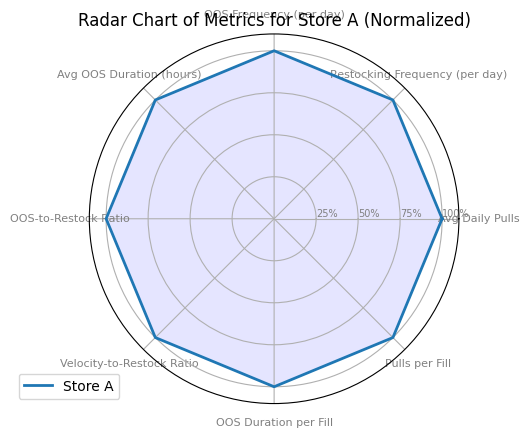

In [ ]:
import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt

index_by_location = pd.read_csv('/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/index_by_location.csv')

# prompt: generar un grafico de radar con las metricas Avg Daily Pulls	Restocking Frequency (per day)	OOS Frequency (per day)	Avg OOS Duration (hours)	OOS-to-Restock Ratio	Velocity-to-Restock Ratio	OOS Duration per Fill	Pulls per Fill de index_by_location
# para location: Store A

# Filter data for the specific location
store_a_data = index_by_location[index_by_location['Location'] == 'Store A'].iloc[0]

# Extract the metrics for the radar chart
metrics = ['Avg Daily Pulls', 'Restocking Frequency (per day)', 'OOS Frequency (per day)',
           'Avg OOS Duration (hours)', 'OOS-to-Restock Ratio', 'Velocity-to-Restock Ratio',
           'OOS Duration per Fill', 'Pulls per Fill']

values = store_a_data[metrics].values

# Normalize the values to a 0-1 range (simple Min-Max scaling)
# Avoid division by zero for metrics that might be 0
min_vals = index_by_location[metrics].min()
max_vals = index_by_location[metrics].max()
normalized_values = [(val - min_vals[i]) / (max_vals[i] - min_vals[i]) if (max_vals[i] - min_vals[i]) != 0 else 0 for i, val in enumerate(values)]

# Add the first value to the end to close the circle
normalized_values = list(normalized_values) + [normalized_values[0]]
metrics = metrics + [metrics[0]] # Add the first metric name to close the circle

# Number of variables
N = len(metrics) - 1

# What angle to place each axis at
angles = [n / float(N) * 2 * 3.14159 for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], metrics[:-1], color='grey', size=8)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25, 0.5, 0.75, 1.0], ["25%", "50%", "75%", "100%"], color="grey", size=7)
plt.ylim(0, 1.1) # Set limits for y-axis (0 to slightly above 1 for better visualization)

# Plot data
ax.plot(angles, normalized_values, linewidth=2, linestyle='solid', label='Store A')

# Fill area
ax.fill(angles, normalized_values, 'b', alpha=0.1)

# Add title and legend
plt.title('Radar Chart of Metrics for Store A (Normalized)')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.show()


### By Sku

In [ ]:
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/index_by_sku.csv'
index_by_sku_df = pd.read_csv(file_path)


index_by_sku_df

,Location Id,Location,Product Id,Product,Total Pulls,Total Products Restocked,Total Restock Incidents,Total OOS Incidents,Avg Daily Pulls,Restocking Frequency (per day),OOS Frequency (per day),Avg OOS Duration (hours),OOS-to-Restock Ratio,Velocity-to-Restock Ratio,OOS Duration per Fill,Pulls per Fill
0,2394,Store B,822,Product 8,62.0,192.0,63,0.0,0.081579,0.082895,0.000000,0.000000,0.000000,0.821902,NaN,0.924287
1,2394,Store B,823,Product 24,30.0,101.0,27,0.0,0.039474,0.035526,0.000000,0.000000,0.000000,0.870030,NaN,1.123053
2,2394,Store B,824,Product 6,9.0,145.0,15,0.0,0.014803,0.019737,0.000000,0.000000,0.000000,0.475489,NaN,0.787599
3,2394,Store B,830,Product 7,10.0,87.0,13,0.0,0.016447,0.017105,0.000000,0.000000,0.000000,0.615949,NaN,0.995851
4,2394,Store B,831,Product 15,1429.0,1466.0,605,4.0,1.880263,0.796053,0.005263,2.499956,0.006299,2.335507,0.393663,2.364734
5,2680,Store A,1250,Product 11,1965.0,1952.0,942,97.0,2.585526,1.239474,0.127632,8.382150,0.104340,2.074933,0.863567,2.091761
6,2680,Store A,1252,Product 19,1137.0,1166.0,630,16.0,1.496053,0.828947,0.021053,10.437511,0.025847,1.785198,0.378201,1.806696
7,2680,Store A,1253,Product 3,6740.0,7090.0,3276,93.0,8.868421,4.310526,0.122368,1.018659,0.028036,2.056023,0.032685,2.060788
8,2680,Store A,1254,Product 17,1828.0,1960.0,837,39.0,2.405263,1.101316,0.051316,6.471075,0.046421,2.164117,0.286381,2.183675
9,2680,Store A,1256,Product 1,37434.0,37160.0,13974,599.0,49.255263,18.386842,0.788158,0.314040,0.042880,2.677113,0.013730,2.678560


### By deployment

In [ ]:
file_path = '/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/data/index_by_deployment.csv'
index_by_deployment_df = pd.read_csv(file_path)

index_by_deployment_df

,Location Id,Location,Deployment Id,Deployment,Avg Daily Pulls,Restocking Frequency (per day),OOS Frequency (per day),Avg OOS Duration (hours),OOS-to-Restock Ratio,Velocity-to-Restock Ratio,OOS Duration per Fill,Pulls per Fill
0,2394,Store B,6,Shelf 6,0.407895,0.176316,0.000000,0.000000,0.000000,0.884961,NaN,1.011576
1,2394,Store B,7,Shelf 7,0.498355,0.197368,0.000000,0.000000,0.000000,1.173495,NaN,1.360452
2,2394,Store B,8,Shelf 8,0.417105,0.194737,0.000000,0.000000,0.000000,1.180135,NaN,1.453616
3,2394,Store B,9,Shelf 9,0.467105,0.181579,0.000000,0.000000,0.000000,1.082267,NaN,1.227147
4,2394,Store B,10,Shelf 10,0.428947,0.201316,0.005263,2.499956,0.006299,1.030884,0.393663,1.303563
5,2680,Store A,1,Shelf 1,6.392105,2.709539,0.219737,6.637021,0.130866,2.222331,1.238232,2.239148
6,2680,Store A,2,Shelf 2,6.176645,2.585855,0.232895,8.940723,0.143187,2.307956,1.476248,2.326572
7,2680,Store A,3,Shelf 3,6.278947,2.625987,0.226974,7.830225,0.140310,2.295758,1.248126,2.313406
8,2680,Store A,4,Shelf 4,6.508882,2.654276,0.244079,7.942181,0.141828,2.314523,1.385200,2.332207
9,2680,Store A,5,Shelf 5,6.457895,2.702303,0.226316,5.585805,0.129333,2.287444,1.060466,2.304933


# Insights manual

## General overview

In [ ]:
import pandas as pd
import json
from google.colab import files  # Import the files object

# Corrected URL for direct CSV export from Google Sheets
sheet_url = "https://docs.google.com/spreadsheets/d/1B3CBmwwrV0hNt-rF4V2q6LNt5p5Ez-aRcqe_TbqB-50/export?format=csv&gid=0"

# Leer el archivo CSV desde Google Sheets
df = pd.read_csv(sheet_url)

# Crear el diccionario de insights sin modificar el texto original
insights = {}
for _, row in df.iterrows():
    # Check if 'Key' and 'Insight' columns exist before accessing
    if "Key" in row and "Insight" in row:
        loc = row["Key"]
        insight_text = row["Insight"]  # Usar el texto tal como está en el archivo
        insights[loc] = insight_text
    else:
        print("Warning: 'Key' or 'Insight' column not found in a row. Skipping.")
        # You might want to add more specific error handling or logging here
        continue


# Guardar como archivo JSON
output_path = "/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/insights/insights_general.json"
with open(output_path, "w", encoding="utf-8") as f:
    json.dump(insights, f, indent=4, ensure_ascii=False)  # Escapar caracteres especiales y formatear

# Descargar el archivo JSON
files.download(output_path)

## By location

In [ ]:
import pandas as pd
import json
from google.colab import files  # Import the files object

# Corrected URL for direct CSV export from Google Sheets
sheet_url = "XXX"

# Leer el archivo CSV desde Google Sheets
df = pd.read_csv(sheet_url)

# Crear el diccionario de insights sin modificar el texto original
insights = {}
for _, row in df.iterrows():
    loc = row["Location"]
    metric = row["Metric"]
    insight_text = row["Insight"]  # Usar el texto tal como está en el archivo
    insights.setdefault(loc, {})[metric] = insight_text

# Guardar como archivo JSON
output_path = "/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/insights/insights_manual.json"
with open(output_path, "w", encoding="utf-8") as f:
    json.dump(insights, f, ensure_ascii=False, indent=4)  # Escapar caracteres especiales y formatear

# Descargar el archivo JSON
files.download(output_path)

In [ ]:
insights

## Key conclusions

In [ ]:
import pandas as pd
import json
from google.colab import files  # Import the files object

# Corrected URL for direct CSV export from Google Sheets
sheet_url = sheet_url = "https://docs.google.com/spreadsheets/d/1737AJZO7kAc7lhmePvBEUyBHktxOy3ud8tkTtCJOZng/export?format=csv&gid=0"


# Leer el archivo CSV desde Google Sheets
df = pd.read_csv(sheet_url)

print("🧪 Columnas encontradas:", df.columns.tolist())

# Crear el diccionario de insights sin modificar el texto original
insights = {}
for _, row in df.iterrows():
    # Check if 'Key' and 'Insight' columns exist before accessing
    if "Location" in row and "Insight" in row:
        loc = row["Location"]
        insight_text = row["Insight"]  # Usar el texto tal como está en el archivo
        insights[loc] = insight_text
    else:
        print("Warning: 'Location' or 'Insight' column not found in a row. Skipping.")
        # You might want to add more specific error handling or logging here
        continue

# Guardar como archivo JSON
output_path = "/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/insights/insights_key_conclusions.json"
with open(output_path, "w", encoding="utf-8") as f:
    json.dump(insights, f, ensure_ascii=False, indent=4)  # Escapar caracteres especiales y formatear

# Descargar el archivo JSON
files.download(output_path)

# Insights by Gemini

In [ ]:
!pip install google-generativeai --upgrade
import google.generativeai as genai


## General

In [ ]:
import os
import pandas as pd
import json
import time
from PIL import Image
import google.generativeai as genai
from google.colab import files  # Solo si estás en Colab


# ==========================
# CONFIGURACIÓN
# ==========================

from getpass import getpass

api_key = getpass("Enter your API key: ")

genai.configure(api_key=api_key)  # ← Reemplaza con tu API key

# Usa el modelo correcto
model = genai.GenerativeModel('gemini-2.0-flash')

FIGURES_DIR = "/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/figures_general"
INSIGHTS_PATH = "/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/insights/insights_general_gem.json"

# ======================
# PROMPTS
# ======================

def get_general_prompt(view_option: str, location_name: str) -> str:
    view_option = view_option.lower()

    if view_option == "general comparison":
        return f"""
You're analyzing **General Comparison** charts for locations including **{location_name}**.

The chart compares metrics like:
- **Total Pulls**
- **Total Fills**
- **OOS Incidents**

Analyze which location outperforms others per metric. Identify if any location consistently leads or lags across all. Comment on balance, gaps, or dominance in categories. End with a **Key Insight** about which location shows strongest or weakest operational patterns.

Use **bolded metrics**, percentages, and the phrase **Key Insight:** ...
Do **not** start with greetings or explanations. Go straight to the analysis.
"""
    elif view_option.startswith("compare by metric"):
        return f"""
You're reviewing the metric **{location_name}** across multiple locations.

Identify which locations perform best or worst in **{location_name}**.
Call out strong or weak performers and summarize trends.
End with a bolded **Key Insight**.

Use **bold** formatting and avoid listing all values. Focus on patterns.
"""
    elif view_option.startswith("compare by location"):
        return f"""
You're reviewing all key metrics for **{location_name}**.

Summarize standout figures (e.g., high pulls, low fills, or frequent OOS).
Highlight balance or imbalance in performance.
End with a **Key Insight** summarizing operational effectiveness.

Avoid raw lists. Use **bold** formatting and markdown.
"""
    else:
        return f"""
You're reviewing a summary chart for **{location_name}**.

Mention any key differences across the displayed values.
Focus on standouts and close with a **Key Insight**.
"""


# ======================
# CARGAR INSIGHTS
# ======================

if os.path.exists(INSIGHTS_PATH):
    with open(INSIGHTS_PATH, "r", encoding="utf-8") as f:
        insights = json.load(f)
else:
    insights = {}

# ======================
# PROCESAR FIGURAS
# ======================

for file in os.listdir(FIGURES_DIR):
    if not file.endswith(".png") or "__" not in file:
        print(f"⚠️ Skipping improperly named file: {file}")
        continue

    filename = file.replace(".png", "")
    view_raw, location_raw = filename.split("__")
    view_option = view_raw.replace("_", " ").strip()
    location_name = location_raw.replace("_", " ").strip()

    # Crear clave única
    if view_option.startswith("Compare by Metric"):
        insight_key = f"Compare by Metric - {location_name}"
    elif view_option.startswith("Compare by Location"):
        insight_key = f"Compare by Location - {location_name}"
    else:
        insight_key = view_option  # e.g., "General Comparison"

    if insight_key in insights:
        print(f"⏩ Already exists: {insight_key}")
        continue

    # Cargar imagen
    image_path = os.path.join(FIGURES_DIR, file)
    image = Image.open(image_path)

    # Prompt
    prompt = get_general_prompt(view_option.lower(), location_name)

    print(f"📊 Generating insight for: {insight_key}...")

    try:
        response = model.generate_content([prompt, image])
        insight = response.text.strip()
        time.sleep(5)
    except Exception as e:
        print(f"❌ Error on {filename}: {str(e)}")
        continue

    insights[insight_key] = insight

# ======================
# GUARDAR RESULTADOS
# ======================

with open(INSIGHTS_PATH, "w", encoding="utf-8") as f:
    json.dump(insights, f, ensure_ascii=False, indent=2)

print(f"\n✅ Insights saved to: {INSIGHTS_PATH}")
files.download(INSIGHTS_PATH)


Enter your API key: ··········
📊 Generating insight for: Compare by Metric - Total Pulls...
📊 Generating insight for: Compare by Metric - OOS Incidents...
📊 Generating insight for: Compare by Metric - Coolers Count...
📊 Generating insight for: Compare by Location - Store A...
⏩ Already exists: General Comparison
📊 Generating insight for: Compare by Metric - SKU Count...
📊 Generating insight for: Compare by Metric - Total Fills...
📊 Generating insight for: Compare by Location - Store B...

✅ Insights saved to: /content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/insights/insights_general_gem.json


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Locations

In [ ]:
import os
import pandas as pd
import json
import time
from PIL import Image
import google.generativeai as genai
from google.colab import files  # Solo si estás en Colab


# ==========================
# CONFIGURACIÓN
# ==========================

from getpass import getpass

api_key = getpass("Enter your API key: ")

genai.configure(api_key=api_key)  # ← Reemplaza con tu API key

# Usa el modelo correcto
model = genai.GenerativeModel('gemini-2.0-flash')

# Rutas
FIGURES_DIR = "/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/figures"
INSIGHTS_PATH = "/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/insights/insights_gem.json"
os.makedirs("insights", exist_ok=True)


# ==========================
# PROMPT SELECCIÓN INTELIGENTE
# ==========================

def get_prompt(location_name: str, view_option: str) -> str:
    view_option = view_option.lower()

    if "general overview" in view_option or "pulls by top" in view_option or "pulls by shelf" in view_option or "why top" in view_option:
        return prompt_pulls(location_name)
    elif "velocity" in view_option or "pv" in view_option:
        return prompt_velocity(location_name)
    elif "restock" in view_option:
        return prompt_restocking(location_name)
    elif "oos" in view_option:
        return prompt_oos(location_name)
    elif "index" in view_option:
        return prompt_index(location_name)
    else:
        return prompt_generic(location_name)


def prompt_pulls(location: str) -> str:
    return f"""
You are a senior data analyst reviewing pull distribution at **{location}**.

Analyze the top SKUs by their percentage of total pulls.
Compare each SKU’s value to the average pull rate, if shown.
If there are 3 or more significant items, use bullet points like this:

- **[Product]** leads with **X%**, above/below the average of **Y%**
- ...

Mention concentration, balance, or sharp differences in demand.
End with a **bolded Key Insight** with an operational takeaway.


Do **not list each metric verbatim**. Instead, summarize what the combination of values implies.
If the image does not provide enough meaningful or disaggregated data to support a specific insight, return nothing.
Do **not** restate raw values or write placeholder observations.
Avoid financial language. Use markdown for **bold values** and the phrase **Key Insight:**
Do **not** start the response with greetings, framing, or setup phrases like “Okay, I will now analyze...”. Start directly with the insight or analysis.

"""


def prompt_velocity(location: str) -> str:
    return f"""
You're reviewing product velocity at **{location}**, comparing daily pulls during active days vs. full period.

- Highlight top-performing SKUs by pull velocity.
- Emphasize gaps between active and period velocity (e.g., signs of OOS or inconsistent stocking).
- If an average line is visible (e.g., “Avg: 16.98”), compare contributors to it.
- Use bullet points if 3 or more products stand out.

End with a **Key Insight** related to demand consistency or stock strategy.
Do **not list each metric verbatim**. Instead, summarize what the combination of values implies.
Focus only on visible metrics. Do not reference sales or revenue.
Do **not** start the response with greetings, framing, or setup phrases like “Okay, I will now analyze...”. Start directly with the insight or analysis.
If the image does not provide enough meaningful or disaggregated data to support a specific insight, return nothing.
Do **not** restate raw values or write placeholder observations.
"""


def prompt_restocking(location: str) -> str:
    return f"""
You are a senior data analyst reviewing restocking behavior for **{location_name}**.

The chart may include some or all of the following metrics:
- **Restocking frequency per day** (bars)
- **Average daily products restocked** (green line)
- **Average daily pulls** (red line)
- **Average time between restocks** (purple line)
- A horizontal line showing the **average restocking frequency**

Please analyze:

1. Which products or coolers are restocked more or less frequently compared to the average.
2. Whether the volume restocked aligns with the frequency — e.g., restocking often but with low volume, or infrequently with large volume.
3. How well restocking matches actual demand (pulls), especially if demand exceeds restocking.
4. Highlight any inefficiencies, delays, or mismatches (e.g., high pulls but low restocking).
5. Mention any cooldowns or extremes in **time between restocks**, especially if long or inconsistent.

Do **not list each metric verbatim**. Instead, summarize what the combination of values implies.
Use **bullet points** if multiple items show distinct behaviors.
End with a **bolded Key Insight** recommending action, flagging issues, or validating operational efficiency.

Do **not** mention sales or revenue. Use **bold** for product/cooler names, values, and the phrase **Key Insight:** ...
Do **not** start the response with greetings, framing, or setup phrases like “Okay, I will now analyze...”. Start directly with the insight or analysis.
If the image does not provide enough meaningful or disaggregated data to support a specific insight, return nothing.
Do **not** restate raw values or write placeholder observations.
"""



def prompt_oos(location: str) -> str:
    return f"""
  You are a senior data analyst reviewing Out-of-Stock (OOS) behavior for **{location_name}**.

The chart may include the following metrics:
- **OOS frequency per day** (red bars)
- **Restocking frequency per day** (orange bars)
- **Average OOS duration in hours** (purple line)
- Dashed lines indicating average OOS frequency and average OOS duration

Please analyze:

1. Which products or coolers show **above-average OOS frequency** or **duration**, and how they compare to their restocking frequency.
2. Identify mismatches — for example:
   - High OOS duration + low restocking
   - Low OOS frequency but still long durations
3. Mention if any items have **very low OOS indicators**, suggesting strong performance.
4. Use **bullet points** if 3+ items show distinct trends.
5. Always finish with a **bolded Key Insight** — ideally actionable (e.g., improve restocking on specific SKUs, flag risk areas).

Do **not list each metric verbatim**. Instead, summarize what the combination of values implies.
Avoid financial language. Only analyze what is visible: OOS metrics, restocking behavior, and comparative gaps.

Use markdown to **bold key values**, product/cooler names, and the phrase **Key Insight: ...**
Do **not** start the response with greetings, framing, or setup phrases like “Okay, I will now analyze...”. Start directly with the insight or analysis.
If the image does not provide enough meaningful or disaggregated data to support a specific insight, return nothing.
Do **not** restate raw values or write placeholder observations.
  """


def prompt_index(location: str) -> str:
      return f"""
 You are a senior data analyst reviewing product/cooler performance indexes for **{location_name}**.

The chart includes multiple performance ratios and metrics such as:
- **Velocity-to-Restock Ratio**
- **OOS-to-Restock Ratio**
- **OOS Duration per Fill (hours)**
- **Pulls per Fill**

These metrics are presented in tables, radar charts, or heatmaps for visual comparison.

Please analyze:

1. Which SKUs or Coolers stand out positively or negatively across the composite metrics.
2. Identify patterns such as:
   - High velocity with low restocking (efficient movement)
   - High OOS duration or poor OOS-to-Restock ratios (inefficiencies)
   - Balanced vs. uneven performance across categories
3. Mention if the performance is consistent or mixed (e.g., strong in one index, weak in another).
4. Use bullet points if 3+ items stand out clearly.
5. Finish with a **bolded Key Insight** — flagging underperformers or recommending where to prioritize attention.

Do **not list each metric verbatim**. Instead, summarize what the combination of values implies.
Do **not** refer to financial terms. Focus only on what’s shown: operational ratios and performance comparisons.

Use markdown:
- **Bold product/cooler names**
- **Bold metric values**
- End with: **Key Insight:** ...
Do **not** start the response with greetings, framing, or setup phrases like “Okay, I will now analyze...”. Start directly with the insight or analysis.
If the image does not provide enough meaningful or disaggregated data to support a specific insight, return nothing.
Do **not** restate raw values or write placeholder observations.
  """


def prompt_generic(location: str) -> str:
    return f"""
You are analyzing an unspecified chart for **{location}**.

- Briefly summarize the overall trend or shape.
- Call out standout items only if visible.
- Do not speculate — stay grounded in what's clearly shown.

Do **not list each metric verbatim**. Instead, summarize what the combination of values implies.
Use **bold** formatting for values and **Key Insight** at the end.
Do **not** start the response with greetings, framing, or setup phrases like “Okay, I will now analyze...”. Start directly with the insight or analysis.
If the image does not provide enough meaningful or disaggregated data to support a specific insight, return nothing.
Do **not** restate raw values or write placeholder observations.
"""


# ==========================
# PROCESAMIENTO DE FIGURAS
# ==========================

# Cargar insights existentes
if os.path.exists(INSIGHTS_PATH):
    with open(INSIGHTS_PATH, "r", encoding="utf-8") as f:
        insights = json.load(f)
else:
    insights = {}

# Reiniciar manualmente si es necesario
to_reset = {
    # "Store B": ["Pulls by Top 10 Sku"],
    # "Store A": ["why top"]
}
for loc, views in to_reset.items():
    if loc in insights:
        for view in views:
            if view in insights[loc]:
                print(f"🧹 Reiniciando insight: {view} en {loc}")
                del insights[loc][view]
        if not insights[loc]:
            del insights[loc]

# Recorrer imágenes
for file in os.listdir(FIGURES_DIR):
    if not file.endswith(".png") or "__" not in file:
        print(f"⚠️ Saltando archivo mal nombrado: {file}")
        continue

    filename = file.replace(".png", "")
    view_key_raw, location_raw = filename.split("__")
    view_option = view_key_raw.replace("_", " ").strip()
    location_name = location_raw.replace("_", " ").strip()

    if location_name in insights and view_option in insights[location_name]:
        print(f"⏩ Ya existe: {view_option} en {location_name}")
        continue

    # Cargar imagen
    image_path = os.path.join(FIGURES_DIR, file)
    image = Image.open(image_path)

    # Obtener el prompt adecuado
    prompt = get_prompt(location_name, view_option)

    print(f"📊 Analizando: {view_option} en {location_name}...")

    try:
        response = model.generate_content([prompt, image])
        insight = response.text.strip()
        time.sleep(7)
    except Exception as e:
        print(f"❌ Error generating insight for {view_option} in {location_name}: {str(e)}")
        continue


    if location_name not in insights:
        insights[location_name] = {}
    insights[location_name][view_option] = insight

# Guardar el JSON actualizado
with open(INSIGHTS_PATH, "w", encoding="utf-8") as f:
    json.dump(insights, f, ensure_ascii=False, indent=2)

print(f"\n✅ Insights actualizados y guardados en: {INSIGHTS_PATH}")

files.download(INSIGHTS_PATH)


Enter your API key: ··········
⏩ Ya existe: General OOS Data en Store A
⏩ Ya existe: General Overview Pulls en Store A
⏩ Ya existe: General OOS Data en Store B
⏩ Ya existe: General Product Velocity en Store A
⏩ Ya existe: General Overview Pulls en Store B
⏩ Ya existe: General Product Velocity en Store B
⏩ Ya existe: General Indexes Analysis en Store B
⏩ Ya existe: General Indexes Analysis en Store A
⏩ Ya existe: PV by Shelf en Store B
⏩ Ya existe: Pulls by Top 10 SKU en Store A
⏩ Ya existe: Pulls by All SKUs en Store B
⏩ Ya existe: Pulls by Top 10 SKU en Store B
⏩ Ya existe: Pulls by All SKUs en Store A
⏩ Ya existe: OOS by Top 10 Sku en Store B
⏩ Ya existe: Pulls by Shelf en Store A
⏩ Ya existe: Pulls by Shelf en Store B
⏩ Ya existe: OOS by Top 10 Sku en Store A
⏩ Ya existe: PV by All SKUs en Store B
⏩ Ya existe: PV by All SKUs en Store A
⏩ Ya existe: Index by Top 10 Sku en Store B
⏩ Ya existe: Index by Shelf en Store A
⏩ Ya existe: OOS by All SKUs en Store B
⏩ Ya existe: OOS by All SK

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: dame claves y valores del diccionario insigh gem en este format: o por ejemplo" Store A": ["why_top"]

import json

insights_gem = {}

output_path = "/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/insights/insights_gem.json"

# Load the JSON file into the insights_gem dictionary
with open(output_path, "r", encoding="utf-8") as f:
    insights_gem = json.load(f)

# Print key-value pairs in the specified format
for location, metrics in insights_gem.items():
    for metric, insight in metrics.items():
        print(f'"{location}": ["{metric}"]')


In [ ]:
# prompt: eliminar algunas keys del diccionario de insight gem

insights_path = "/content/drive/MyDrive/JOB 2/Portfolio/Streamlit_dashboard/insights/insights_gem.json"

# Lista de claves a eliminar manualmente
# Add the key you want to remove under the respective location
to_remove = {
  "Store A": [
      # "General Overview Pulls",
      # "why top",
      # "Pulls by Shelf",
      # "Pulls by All SKUs",
      # "Pulls by Top 10 Sku",
      # "General Product Velocity",
      # "PV by Shelfr",
      # "PV by All SKUs"
      # "PV by Top 10 Sku",
      # "General OOS Data",
      # "OOS by All SKUs"
      # "OOS by Top 10 Sku",
      # "OOS by Shelf",
      # "Restocking by Shelf",
      # "Restocking by All SKUs"
      # "Restocking by Top 10 Sku",
      # "General Restocking Data",
      # "General Indexes Analysis",
      # "Index by All SKUs"
      # "Index by Top 10 Sku",
      # "Index by Shelf",
  ],
  "Store B": [
     # "General Overview Pulls",
      # "why top",
      # "Pulls by Shelf",
      # "Pulls by All SKUs",
      # "Pulls by Top 10 Sku",
      # "General Product Velocity",
      # "PV by Shelfr",
      # "PV by All SKUs"
      # "PV by Top 10 Sku",
      # "General OOS Data",
      # "OOS by All SKUs"
      # "OOS by Top 10 Sku",
      # "OOS by Shelf",
      # "Restocking by Shelf",
      # "Restocking by All SKUs"
      # "Restocking by Top 10 Sku",
      # "General Restocking Data",
      # "General Indexes Analysis",
      # "Index by All SKUs"
      # "Index by Top 10 Sku",
      # "Index by Shelf",
  ]
}

# Eliminar los insights antes de procesar
for loc, views in to_remove.items():
    if loc in insights:
        for view in views:
            if view in insights[loc]:
                print(f"🧹 Eliminando insight: {view} en {loc}")
                del insights[loc][view]
        # Optionally, remove the location if it has no remaining views
        if not insights[loc]:
             del insights[loc]

# Save the updated JSON
with open(insights_path, "w", encoding="utf-8") as f:
    json.dump(insights, f, ensure_ascii=False, indent=2)

print(f"Insights updated and save in {insights_path}")


